# Explication du projet

Ce projet consiste à réaliser une analyse exploratoire d’un jeu de données sur l’éducation fourni par la Banque mondiale (EdStats All Indicator Query). L’objectif est d’évaluer la qualité et la pertinence de ces données et de déterminer si la start-up Academy proposant des contenus de formation en ligne pour un public lycéen et universitaire a intérêt à s'étendre à l'international. L’étude permettra d'établir un classement des pays basé sur un scoring construit à partir de plusieurs indicateurs clés, afin de comparer leur attractivité potentielle et de prioriser les marchés les plus prometteurs.

L'analyse se fera en plusieurs étapes:
- Analyse globale de chacun des fichiers pour comprendre quelles informations seront utiles
- Selection des indicateurs pertinents pour l'analyse
- Ajout de certaines variables utiles pour l'analyse
- Selection de la periode à conserver pour l'analyse
- Formatage de la table
- Filtre des pays à inclure dans l'analyse
- Gestion des valeurs manquantes
- Analyses descriptives des variables
- Visualisation de l'évoloution des différents indicateurs et représentation de la distribution à un temps donné
- Analyse de la corrélation entre les variables
- Regroupement de variables
- Scoring

Les résultats de cette analyse permettront d’éclairer les décisions stratégiques d’ouverture d'Academy vers de nouveaux marchés à l’international, en identifiant les pays présentant les conditions les plus favorables au développement de ses services.

# Sommaire
- [1 Explication du projet](#Explication-du-projet)
- [2 Sommaire](#Sommaire)
- [3 Import](#Import-des-bibliothèques-et-des-données)
- [4 Analyse global de chacun des fichiers](#Analyse-globale-de-chacun-des-fichiers)
- [5 Sélection des indicateurs](#Sélection-des-indicateurs)
- [6 Ajout de données utiles pour l'analyse](#Ajout-de-données-utiles-pour-l'analyse)
- [7 Sélection des dates à conserver](#Sélection-des-dates-à-conserver)
- [8 Formatage de la table](#Formatage-de-la-table)
- [9 Filtre sur les pays](#Filtre-sur-les-pays)
- [10 Gestion des valeurs manquantes](#Gestion-des-valeurs-manquantes)
- [11 Analyses Descriptives](#Analyses-Descriptives)
- [12 Corrélation entre les variables](#Corrélation-entre-les-variables)
- [13 Regroupement de variables](#Regroupement-de-variables)
- [14 Scoring](#Scoring)
- [15 Conclusions](#Conclusions)

#  Import des bibliothèques et des données

## Librairies

In [1]:
# Manipulation de données
import pandas as pd
import missingno as msno
import numpy as np

# Visualisation
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Vérification des versions des librairies
print(f"Pandas: {pd.__version__}")
print(f"Numpy: {np.__version__}")
print(f"Missigno: {msno.__version__}")
print(f"Seaborn: {sns.__version__}")
print(f"Matplotlib: {plt.matplotlib.__version__}")

Pandas: 2.3.1
Numpy: 1.26.4
Missigno: 0.5.2
Seaborn: 0.13.2
Matplotlib: 3.10.1


## Données

In [3]:
# Chargement des données
Country = pd.read_csv("../Data/EdStatsCountry.csv")
Country_Series = pd.read_csv("../Data/EdStatsCountry-Series.csv")
Data= pd.read_csv("../Data/EdStatsData.csv")
FootNote = pd.read_csv("../Data/EdStatsFootNote.csv")
Series = pd.read_csv("../Data/EdStatsSeries.csv")

# Analyse globale de chacun des fichiers

Dans un premier temps, chaque fichier sera analysé de manière globale afin d’identifier précisément les informations qu’il contient, d’évaluer la qualité des données et de détecter d’éventuelles incohérences ou valeurs manquantes. Cette analyse exploratoire permettra également de définir les stratégies d’analyse et de traitement les plus adaptées pour la suite : méthodes de nettoyage, formatage des données et choix des indicateurs pertinents. 

## Country

In [4]:
# Nombre de variables et d'observations
Country.shape

(241, 32)

In [5]:
# Noms des variables
Country.columns

Index(['Country Code', 'Short Name', 'Table Name', 'Long Name', '2-alpha code',
       'Currency Unit', 'Special Notes', 'Region', 'Income Group', 'WB-2 code',
       'National accounts base year', 'National accounts reference year',
       'SNA price valuation', 'Lending category', 'Other groups',
       'System of National Accounts', 'Alternative conversion factor',
       'PPP survey year', 'Balance of Payments Manual in use',
       'External debt Reporting status', 'System of trade',
       'Government Accounting concept', 'IMF data dissemination standard',
       'Latest population census', 'Latest household survey',
       'Source of most recent Income and expenditure data',
       'Vital registration complete', 'Latest agricultural census',
       'Latest industrial data', 'Latest trade data',
       'Latest water withdrawal data', 'Unnamed: 31'],
      dtype='object')

In [6]:
# Visualisation d'un échantillon de 5 observations
Country.sample(5)

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
125,LIE,Liechtenstein,Liechtenstein,Principality of Liechtenstein,LI,Swiss franc,NaN,Europe & Central Asia,High income: nonOECD,LI,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
109,KEN,Kenya,Kenya,Republic of Kenya,KE,Kenyan shilling,Fiscal year end: June 30; reporting period for...,Sub-Saharan Africa,Low income,KE,...,General Data Dissemination System (GDDS),2009,"Malaria Indicator Survey (MIS), 2010; HIV/Mate...","Integrated household survey (IHS), 2005/06",NaN,2009. Population and Housing Census.,2010.0,2010.0,2003,NaN
150,MNG,Mongolia,Mongolia,Mongolia,MN,Mongolian tugrik,NaN,East Asia & Pacific,Lower middle income,MN,...,General Data Dissemination System (GDDS),2010,"Multiple Indicator Cluster Survey (MICS), 2010",Living Standards Measurement Study Survey (LSM...,Yes,2012,2008.0,2007.0,2009,NaN
55,DOM,Dominican Republic,Dominican Republic,Dominican Republic,DO,Dominican peso,NaN,Latin America & Caribbean,Upper middle income,DO,...,General Data Dissemination System (GDDS),2010,"Demographic and Health Survey (DHS), 2013","Integrated household survey (IHS), 2012",NaN,2012/13,NaN,2012.0,2005,NaN
135,MAR,Morocco,Morocco,Kingdom of Morocco,MA,Moroccan dirham,NaN,Middle East & North Africa,Lower middle income,MA,...,Special Data Dissemination Standard (SDDS),2004,Multiple Indicator Cluster Survey (MICS)/Pan A...,"Expenditure survey/budget survey (ES/BS), 2007",NaN,2012,2010.0,2012.0,2000,NaN


In [7]:
# Nombre de valeurs manquantes par variables
Country.isnull().mean()

Country Code                                         0.000000
Short Name                                           0.000000
Table Name                                           0.000000
Long Name                                            0.000000
2-alpha code                                         0.012448
Currency Unit                                        0.107884
Special Notes                                        0.398340
Region                                               0.112033
Income Group                                         0.112033
WB-2 code                                            0.004149
National accounts base year                          0.149378
National accounts reference year                     0.867220
SNA price valuation                                  0.182573
Lending category                                     0.402490
Other groups                                         0.759336
System of National Accounts                          0.107884
Alternat

In [8]:
# Nombre de lignes dupliquées
Country.duplicated().sum()

0

In [9]:
# Types des variables
Country.dtypes

Country Code                                          object
Short Name                                            object
Table Name                                            object
Long Name                                             object
2-alpha code                                          object
Currency Unit                                         object
Special Notes                                         object
Region                                                object
Income Group                                          object
WB-2 code                                             object
National accounts base year                           object
National accounts reference year                     float64
SNA price valuation                                   object
Lending category                                      object
Other groups                                          object
System of National Accounts                           object
Alternative conversion f

Ce fichier regroupe un ensemble d’informations descriptives sur chacun des pays présents dans la base EdStats. Il contient notamment des données d’identification (codes pays, noms officiels), des informations géographiques et administratives, ainsi que des éléments de classification utilisés par la Banque mondiale. Il sera particulièrement utile pour associer chaque pays à sa région géographique et, plus largement, pour éventuellement enrichir l’analyse avec des informations contextuels permettant d’effectuer des regroupements, des comparaisons ou des filtrages pertinents au cours de l'analyse.

## Country_Series

In [10]:
# Nombre de variables et d'observations
Country_Series.shape

(613, 4)

In [11]:
# Noms des variables
Country_Series.columns

Index(['CountryCode', 'SeriesCode', 'DESCRIPTION', 'Unnamed: 3'], dtype='object')

In [12]:
# Visualisation d'un échantillon de 5 observations
Country_Series.sample(5)

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
73,BRN,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
381,MUS,SP.POP.0014.FE.IN,Derived using ratio of age group from WPP and ...,NaN
300,LIE,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
176,GAB,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
193,GEO,SP.POP.TOTL.FE.ZS,Excluding Abkhazia and South Ossetia.,NaN


In [13]:
# Taux de valeurs manquantes par variables
Country_Series.isnull().mean()

CountryCode    0.0
SeriesCode     0.0
DESCRIPTION    0.0
Unnamed: 3     1.0
dtype: float64

In [14]:
# Nombre de lignes dupliquées
Country_Series.duplicated().sum()

0

In [15]:
# Types des variables
Country_Series.dtypes

CountryCode     object
SeriesCode      object
DESCRIPTION     object
Unnamed: 3     float64
dtype: object

Ce fichier regroupe des informations descriptives et des annotations sur les séries d’indicateurs. Chaque ligne associe un code pays et un code d’indicateur (SeriesCode) à une description précisant la source des données, les méthodes de calcul ou d’éventuelles particularités propres à certains pays (par exemple des exclusions territoriales ou des données dérivées). Il ne contient pas de valeurs numériques, mais fournit des éléments essentiels pour comprendre, contextualiser et interpréter correctement les indicateurs présents dans le fichier EdStat_Data.

## Data 

In [16]:
# Nombre de variables et d'observations
Data.shape

(886930, 70)

In [17]:
# Noms des colonnes
Data.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Unnamed: 69'],
      dtype='object')

In [18]:
# Visualisation d'un échantillon de 5 observations
Data.sample(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
200313,Bulgaria,BGR,"Population, age 4, total",SP.POP.AG04.TO.UN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
328329,Faroe Islands,FRO,PIAAC: Male adults by literacy proficiency lev...,LO.PIAAC.LIT.MA.45,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
326764,Faroe Islands,FRO,DHS: Net attendance rate. Secondary,HH.DHS.NAR.23,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
436738,Israel,ISR,DHS: Primary completion rate. Quintile 2,HH.DHS.PCR.Q2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
200404,Bulgaria,BGR,"Population, ages 5-10, male",SP.POP.0510.MA.UN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# Taux de valeurs manquantes par variables
Data.isnull().mean()

Country Name      0.000000
Country Code      0.000000
Indicator Name    0.000000
Indicator Code    0.000000
1970              0.918496
                    ...   
2085              0.942007
2090              0.942007
2095              0.942007
2100              0.942007
Unnamed: 69       1.000000
Length: 70, dtype: float64

In [20]:
# Nombre de lignes dupliquées
Data.duplicated().sum()

0

In [21]:
# Types des variables
Data.dtypes

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1970              float64
                   ...   
2085              float64
2090              float64
2095              float64
2100              float64
Unnamed: 69       float64
Length: 70, dtype: object

Ce fichier contient l’ensemble des données brutes issues des indicateurs liés à l'éducation pour chaque pays et pour chaque année disponible. Il regroupe donc les valeurs numériques associées à des centaines d’indicateurs (taux de scolarisation, dépenses publiques d’éducation, performances scolaires, etc.). Il s'agit de la source principale de données qui seront utilisées dans l’analyse et c'est donc à partir de ce fichier que seront extraits, filtrés et structurés les indicateurs pertinents, qui serviront ensuite à construire le score final permettant de comparer et de classer les pays.

## Footnote

In [22]:
# Nombre de variables et d'observations
FootNote.shape

(643638, 5)

In [23]:
# Noms des variables
FootNote.columns

Index(['CountryCode', 'SeriesCode', 'Year', 'DESCRIPTION', 'Unnamed: 4'], dtype='object')

In [24]:
# Visualisation d'un échantillons de 5 observations
FootNote.sample(5)

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
551066,STP,SE.SEC.ENRR.FE,YR2009,Estimated,NaN
562206,SWZ,SE.PRM.GINT.ZS,YR1992,Country Data,NaN
394177,MEA,SE.SEC.ENRR.MA,YR1996,UNESCO Institute for Statistics (UIS) estimate,NaN
587383,TTO,SE.PRM.NENR,YR1982,Country Data,NaN
223693,GRD,SE.PRM.ENRL.FE,YR1986,Country Data,NaN


In [25]:
# Nombre de valeurs manquantes par variables
FootNote.isnull().sum()

CountryCode         0
SeriesCode          0
Year                0
DESCRIPTION         0
Unnamed: 4     643638
dtype: int64

In [26]:
# Nombre de lignes dupliquées
FootNote.duplicated().sum()

0

In [27]:
# Types des variables
FootNote.dtypes

CountryCode     object
SeriesCode      object
Year            object
DESCRIPTION     object
Unnamed: 4     float64
dtype: object

Ce fichier fournit des informations complémentaires et des annotations spécifiques par pays, par indicateur et par année. Il détaille notamment la manière dont les indicateurs ont été calculés ou estimés, la source des données pour une année donnée, ainsi que d’éventuelles remarques méthodologiques ou conditions particulières liées à la collecte ou au traitement des données. Ces précisions sont essentielles pour interpréter correctement les valeurs numériques et prendre en compte leurs limites éventuelles dans l’analyse.

## Series

In [28]:
# Nombre de variables et d'observations
Series.shape

(3665, 21)

In [29]:
# Noms des variables
Series.columns

Index(['Series Code', 'Topic', 'Indicator Name', 'Short definition',
       'Long definition', 'Unit of measure', 'Periodicity', 'Base Period',
       'Other notes', 'Aggregation method', 'Limitations and exceptions',
       'Notes from original source', 'General comments', 'Source',
       'Statistical concept and methodology', 'Development relevance',
       'Related source links', 'Other web links', 'Related indicators',
       'License Type', 'Unnamed: 20'],
      dtype='object')

In [30]:
# Visualisation d'un échantillons de 5 observations
Series.sample(5)

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
2577,SP.POP.AG22.FE.UN,Population,"Age population, age 22, female, UNESCO",NaN,"Age population, female refers to female popula...",NaN,Annual,NaN,Health: Population: Structure,NaN,...,NaN,NaN,UNESCO Institute for Statistics.,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2286,SE.SCH.LIFE.MA,Tertiary,"School life expectancy, primary to tertiary, m...",NaN,Number of years a person of school entrance ag...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2190,SABER.TER.GOAL4.LVL3,Tertiary Education (SABER),SABER: (Tertiary Education) Policy Goal 4 Leve...,Data Interpretation: 1=Latent; 2=Emerging; 3=E...,Data Interpretation: 1=Latent; 2=Emerging; 3=E...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Systems Approach for Better Education Results ...,NaN,NaN,http://saber.worldbank.org/index.cfm,NaN,NaN,NaN,NaN
3310,UIS.R.2.GPV.G1.F,Secondary,Repeaters in Grade 1 of lower secondary genera...,NaN,Number of pupils in the specified grade who ar...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994,SABER.EMIS.GOAL1,Education Management Information Systems (SABER),SABER: (Education Management Information Syste...,Data Interpretation: 1=Latent; 2=Emerging; 3=E...,Data Interpretation: 1=Latent; 2=Emerging; 3=E...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Systems Approach for Better Education Results ...,NaN,NaN,http://saber.worldbank.org/index.cfm,NaN,NaN,NaN,NaN


In [31]:
# Nombre de valeurs manquantes par variables
Series.isnull().mean()

Series Code                            0.000000
Topic                                  0.000000
Indicator Name                         0.000000
Short definition                       0.411733
Long definition                        0.000000
Unit of measure                        1.000000
Periodicity                            0.972988
Base Period                            0.914325
Other notes                            0.849386
Aggregation method                     0.987176
Limitations and exceptions             0.996180
Notes from original source             1.000000
General comments                       0.996180
Source                                 0.000000
Statistical concept and methodology    0.993724
Development relevance                  0.999181
Related source links                   0.941337
Other web links                        1.000000
Related indicators                     1.000000
License Type                           1.000000
Unnamed: 20                            1

In [32]:
# Nombre de lignes dupliquées
Series.duplicated().sum()

0

In [33]:
# Types des variables
Series.dtypes

Series Code                             object
Topic                                   object
Indicator Name                          object
Short definition                        object
Long definition                         object
Unit of measure                        float64
Periodicity                             object
Base Period                             object
Other notes                             object
Aggregation method                      object
Limitations and exceptions              object
Notes from original source             float64
General comments                        object
Source                                  object
Statistical concept and methodology     object
Development relevance                   object
Related source links                    object
Other web links                        float64
Related indicators                     float64
License Type                           float64
Unnamed: 20                            float64
dtype: object

Ce fichier contient des informations détaillées sur les indicateurs éducatifs présents dans la base de données. Chaque indicateur est identifié par un code unique (Series Code) et est regroupé sous un ou plusieurs thèmes (Topic) permettant de structurer l’analyse par domaines (par exemple : population, enseignement secondaire, gestion de l’éducation, etc.). Le fichier fournit également des définitions courtes et longues de chaque indicateur, les unités de mesure, la périodicité des données, ainsi que des notes méthodologiques, des commentaires, les sources d’origine et des liens utiles. Ces informations sont également très importantes pour comprendre précisément la nature des indicateurs, leur portée, leur contexte d’utilisation.

# Sélection des indicateurs

Les indicateurs ont été sélectionnés à partir d'une analyse approfondie du fichier Series, en identifiant et explorant les Topics les plus pertinents. Ce travail a été complété par une exploration détaillée du site source des données accessible via ce [lien]((https://datacatalog.worldbank.org/dataset/education-statistics)). Les domaines qui ont parus les plus pertinents pour identifier les indicateurs a partir desquels le score sera construit sont les suivants:
 - **Secondary** : indicateurs liés à l’enseignement secondaire, comprenant les taux d’inscription à ce niveau.
- **Tertiary** : données concernant l’enseignement supérieur, intégrant également les taux d’inscription à ce niveau.
- **Teacher** : statistiques sur le corps enseignant, telles que le nombre d’enseignants dans les niveaux secondaire et supérieur.
- **Population** : indicateurs démographiques ciblant particulièrement les tranches d’âge concernées par la scolarisation.
- **Expenditures** : dépenses publiques relatives à l’éducation, exprimées en proportion du PIB ou par étudiant.
- **Literacy** : taux d’alphabétisation des jeunes, indicateur fondamental du niveau d’éducation acquis.
- **Economic policy** : variables économiques globales qui impactent indirectement le système éducatif, telles que le PIB par habitant ou le taux de chômage.

In [34]:
# Création d'une liste contenant les noms des indicateurs retenus
Relevant_indicator = ['Gross enrolment ratio, secondary, both sexes (%)',
                     'Gross enrolment ratio, tertiary, both sexes (%)',
                     'Internet users (per 100 people)',
                     'Youth literacy rate, population 15-24 years, both sexes (%)',
                     'Government expenditure per secondary student as % of GDP per capita (%)',
                     'Government expenditure per tertiary student as % of GDP per capita (%)',
                      'Population, ages 15-24, total', 
                      'Unemployment, total (% of total labor force)',
                      'Teachers in secondary education, both sexes (number)',
                      'Teachers in tertiary education programmes, both sexes (number)',
                     'GDP per capita (current US$)',
                     'Population growth (annual %)',
                     'Lower secondary completion rate, both sexes (%)']

# Filtre de la data frame pour ne garder que les lignes correspondant aux indicateurs selectionnés
Data = Data[Data['Indicator Name'].isin(Relevant_indicator)]

# Ajout de données utiles pour l'analyse

Afin de pouvoir mener des analyses en regroupant les pays par région, la variable région issue du fichier Country a été ajoutée au fichier de données.

In [35]:
# Ajout de la variable region
Variable_Region = Country[['Country Code', 'Region']]
Data = pd.merge(Data, Variable_Region, on='Country Code', how='left')

# Visualisation des 5 premières lignes de la table
Data.sample(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69,Region
2083,Myanmar,MMR,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,NaN,20.148451,20.591681,21.34791,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,East Asia & Pacific
854,Chile,CHL,"Teachers in secondary education, both sexes (n...",SE.SEC.TCHR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Latin America & Caribbean
679,British Virgin Islands,VGB,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
840,Channel Islands,CHI,"Population, ages 15-24, total",SP.POP.1524.TO.UN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Europe & Central Asia
1717,Lao PDR,LAO,Government expenditure per secondary student a...,SE.XPD.SECO.PC.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,East Asia & Pacific


# Sélection des dates à conserver

Afin de pouvoir selectionner la période la plus pertinente à analyser le nombre de valeurs manquantes par année doit être étudié

In [36]:
# Affichage du taux de valeurs manquantes des variables du fichier data
Data.isnull().mean()

Country Name      0.000000
Country Code      0.000000
Indicator Name    0.000000
Indicator Code    0.000000
1970              0.803560
                    ...   
2090              1.000000
2095              1.000000
2100              1.000000
Unnamed: 69       1.000000
Region            0.115702
Length: 71, dtype: float64

<Axes: >

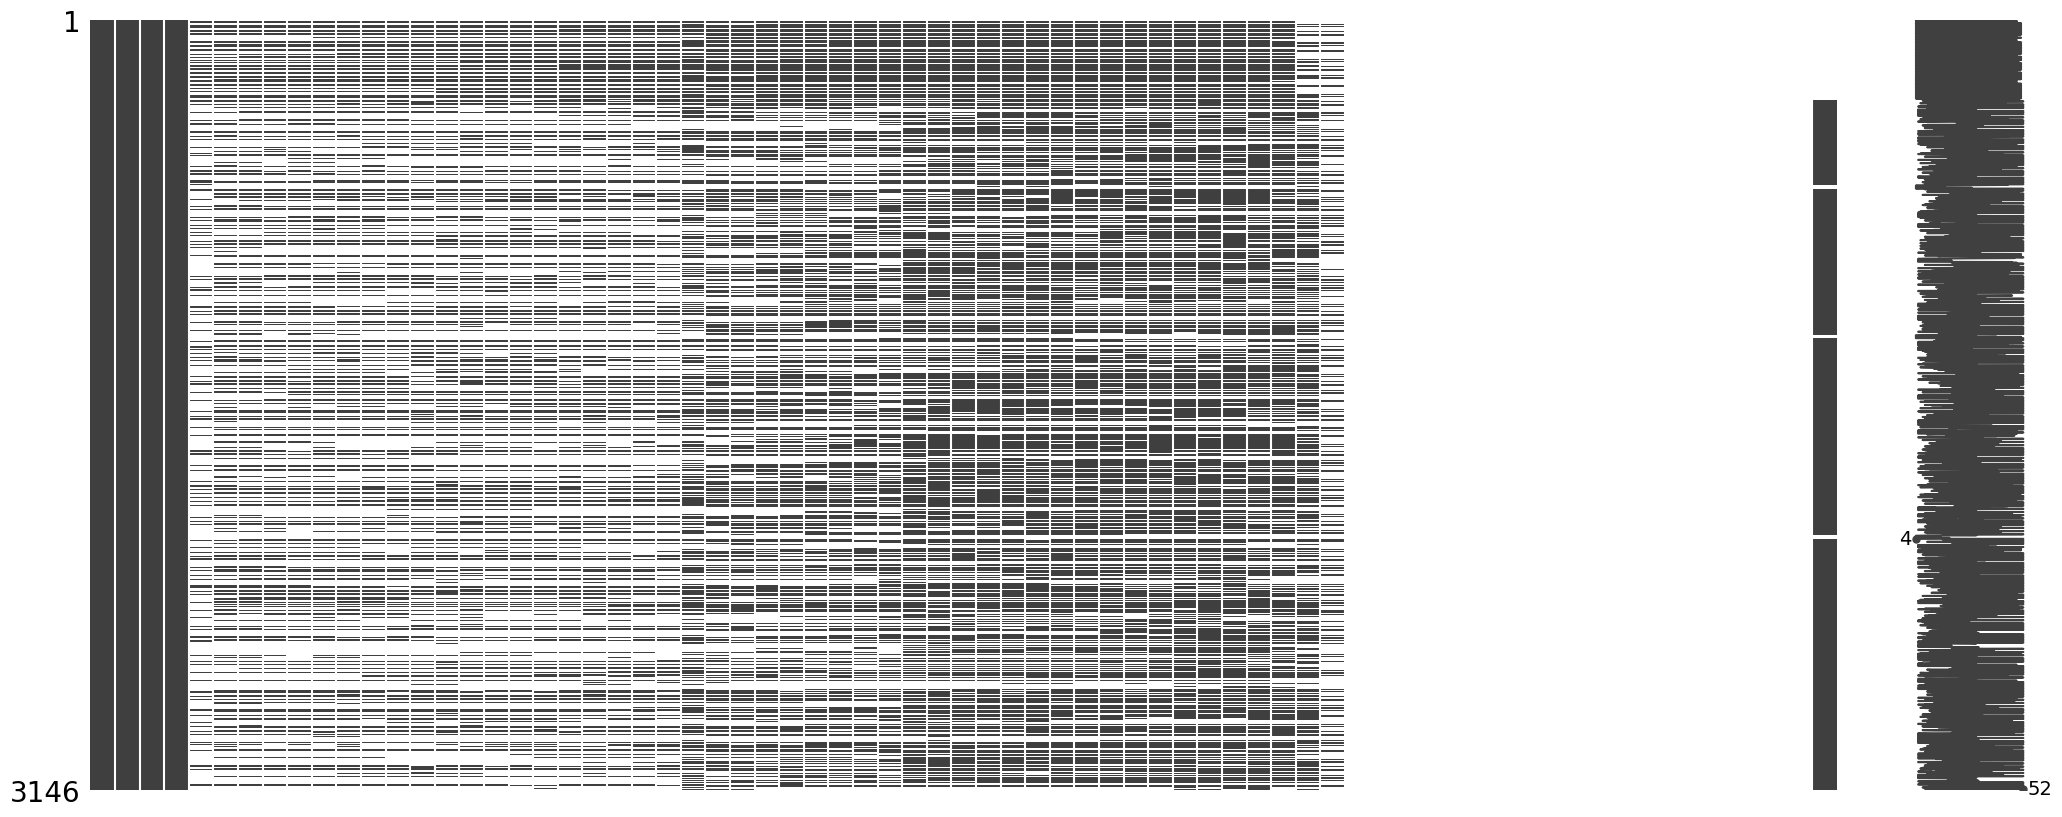

In [37]:
# Viusalisation du taux de valeurs manquantes
msno.matrix(Data)

- Les quatre premières variables correspondants aux noms/code des pays et indicateurs ne contiennent pas de valeurs manquantes
- La dernière variable correspond à la variable région et contient peu de valeurs manquantes
- Concernant les années, on distingue 4 pattern de valeurs manquantes   
    1) le premier bloc contient peu de valeurs manquantes dans les premières lignes mais semble avoir plus de valeurs manquantes dans le reste
    2) le deuxième bloc a à peu pres le même pattern mais le taux de valeurs manquantes semble plus faible
    3) le troisieme bloc semble avoir encore moins de données manquantes sur l'ensemble des lignes
    4) le troisieme bloc ne contient que des valeurs manquantes
 
 On note une année entre le bloc 3 et 4 qui semble avoir moins de données manquante que le bloc 3.   
 
 On peut regarder pour quelles années on a moins de 50 de valeurs manquantes

In [38]:
# Affichage des variables avec moins de 50% de données manquantes
Data.columns[Data.isnull().mean() < 0.5]

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1995', '1996', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', 'Region'],
      dtype='object')

Pour répondre au mieux à la question posée par le projet on va restreindre l'analyse à la période suivante : 2000 -> 2015.
Je fais débuter ma période à l'année 2000 car c'est à partir de ces années là qu'internet a commencé à être fortement utilisé à travers le monde.

<Axes: >

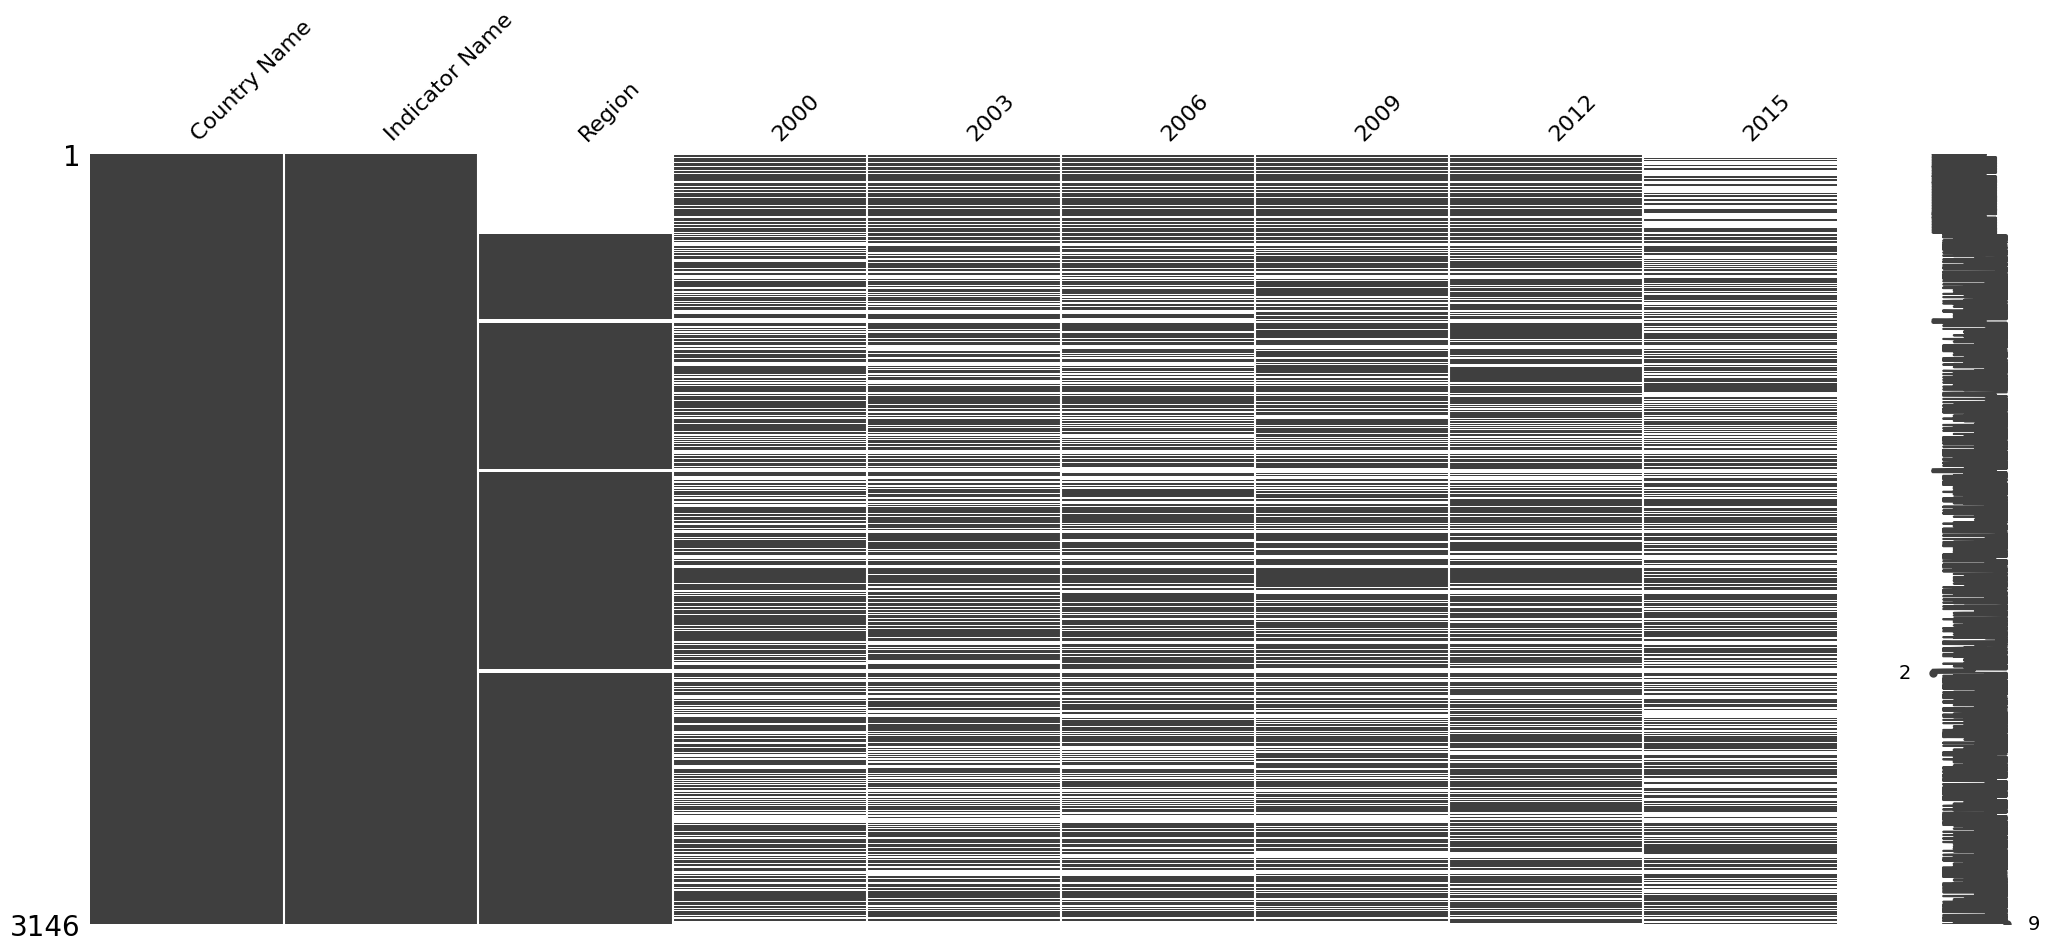

In [39]:
# Selection des dates à inclure dans l'analyse
Data = Data[['Country Name', 'Indicator Name', 'Region', '2000', '2003', '2006', '2009', '2012', '2015']]
msno.matrix(Data)

# Formatage de la table

Les étapes suivantes vont permettre de formatter la table pour avoir les indicateurs en colonnes et les années dans une même variable

## Formatage

In [40]:
# Reformatage de la data frame pour avoir les années regroupées dans une même variable nommée Year
Data_melted =pd.melt(Data, id_vars=['Country Name', 'Region', 'Indicator Name'], 
                    value_vars=['2000', '2003', '2006', '2009','2012', '2015'], 
                    var_name='Year', value_name='Value')

# Reformatage de la data frame pour avoir les indicateurs séparées dans plusieurs variables.
Data_pivoted = Data_melted.pivot_table(index=['Country Name', 'Region', 'Year'], 
                                   columns='Indicator Name', 
                                   values='Value', 
                                   aggfunc='first').reset_index()
Data_pivoted = Data_pivoted.rename_axis(None, axis=1)

# Viusalisation des 5 premières lignes de la table 
Data_pivoted.head()

,Country Name,Region,Year,GDP per capita (current US$),Government expenditure per secondary student as % of GDP per capita (%),Government expenditure per tertiary student as % of GDP per capita (%),"Gross enrolment ratio, secondary, both sexes (%)","Gross enrolment ratio, tertiary, both sexes (%)",Internet users (per 100 people),"Lower secondary completion rate, both sexes (%)",Population growth (annual %),"Population, ages 15-24, total","Teachers in secondary education, both sexes (number)","Teachers in tertiary education programmes, both sexes (number)","Unemployment, total (% of total labor force)","Youth literacy rate, population 15-24 years, both sexes (%)"
0,Afghanistan,South Asia,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.494659,3979438.0,NaN,NaN,1.0,NaN
1,Afghanistan,South Asia,2003,198.728544,NaN,NaN,13.317080,1.25684,0.087891,NaN,4.818041,4486256.0,NaN,1688.0,8.4,NaN
2,Afghanistan,South Asia,2006,272.563077,NaN,NaN,29.930460,NaN,2.107124,NaN,3.228630,5134377.0,NaN,NaN,8.4,NaN
3,Afghanistan,South Asia,2009,445.893298,NaN,NaN,46.732761,3.90339,3.550000,NaN,2.569114,5848604.0,NaN,3342.0,8.2,NaN
4,Afghanistan,South Asia,2012,669.009051,7.07116,NaN,56.677341,NaN,5.454545,NaN,3.272703,6569239.0,NaN,NaN,8.0,NaN


## Analyse de la dataframe finale

Le type des indicateurs et autres variables de la table final obtenu après après formattage est vérifié 

In [41]:
#Vérification des types de chacune des varaibles
Data_pivoted.dtypes

Country Name                                                                object
Region                                                                      object
Year                                                                        object
GDP per capita (current US$)                                               float64
Government expenditure per secondary student as % of GDP per capita (%)    float64
Government expenditure per tertiary student as % of GDP per capita (%)     float64
Gross enrolment ratio, secondary, both sexes (%)                           float64
Gross enrolment ratio, tertiary, both sexes (%)                            float64
Internet users (per 100 people)                                            float64
Lower secondary completion rate, both sexes (%)                            float64
Population growth (annual %)                                               float64
Population, ages 15-24, total                                              float64
Teac

L'année n'est ici pas considérée comme numérique on va la convertir en donnée numérique

In [42]:
# Conversion de la variable année en format numérique
Data_pivoted['Year']=pd.to_numeric(Data_pivoted['Year'])

## Attribution d'un short name à chaque Indicateur

Afin de faciliter la lecture des différents graphiques qui seront construits, un short name est attribué à chacun des incicateurs.

In [43]:
# Créaction d'une liste contenant des noms d'incateurs plus courts placer dans le même ordre que dans la data frame 
Short_name = ['GDP per Capita (US$)', 'Gov Expenditure Sec (%)', 'Gov Expenditure Ter (%)',
               'GER Secondary (%)', 'GER Tertiary (%)', 'Internet Users (%)', 
              'Lower Sec Completion (%)',
               'Pop Growth (%)', 'Pop 15-24', 'Teachers Sec (#)', 'Teachers Ter (#)',  
              'Unemployment (%)',  'Youth Literacy Rate (%)']

# Création d'un dictionnaire faisant la correspondance nom long : nom cours
New_names = { Data_pivoted.columns[3]:Short_name[0],
             Data_pivoted.columns[4]:Short_name[1],
             Data_pivoted.columns[5]:Short_name[2],
             Data_pivoted.columns[6]:Short_name[3],
             Data_pivoted.columns[7]:Short_name[4],
             Data_pivoted.columns[8]:Short_name[5],
             Data_pivoted.columns[9]:Short_name[6],
             Data_pivoted.columns[10]:Short_name[7],
             Data_pivoted.columns[11]:Short_name[8],
             Data_pivoted.columns[12]:Short_name[9],
             Data_pivoted.columns[13]:Short_name[10],
              Data_pivoted.columns[14]:Short_name[11],
              Data_pivoted.columns[15]:Short_name[12]}

# Changements des noms des indicateurs
Data_pivoted = Data_pivoted.rename(columns=New_names)

# Filtre sur les pays

In [44]:
# Vérification qu'il n'y a pas de valeurs anormales dans la variable Country Name
for pays in Data_pivoted['Country Name'].unique():
    print(pays)

Afghanistan
Albania
Algeria
American Samoa
Andorra
Angola
Antigua and Barbuda
Argentina
Armenia
Aruba
Australia
Austria
Azerbaijan
Bahamas, The
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Belize
Benin
Bermuda
Bhutan
Bolivia
Bosnia and Herzegovina
Botswana
Brazil
Brunei Darussalam
Bulgaria
Burkina Faso
Burundi
Cabo Verde
Cambodia
Cameroon
Canada
Cayman Islands
Central African Republic
Chad
Channel Islands
Chile
China
Colombia
Comoros
Congo, Dem. Rep.
Congo, Rep.
Costa Rica
Cote d'Ivoire
Croatia
Cuba
Curacao
Cyprus
Czech Republic
Denmark
Djibouti
Dominica
Dominican Republic
Ecuador
Egypt, Arab Rep.
El Salvador
Equatorial Guinea
Eritrea
Estonia
Ethiopia
Faroe Islands
Fiji
Finland
France
French Polynesia
Gabon
Gambia, The
Georgia
Germany
Ghana
Greece
Greenland
Grenada
Guam
Guatemala
Guinea
Guinea-Bissau
Guyana
Haiti
Honduras
Hong Kong SAR, China
Hungary
Iceland
India
Indonesia
Iran, Islamic Rep.
Iraq
Ireland
Isle of Man
Israel
Italy
Jamaica
Japan
Jordan
Kazakhstan
Kenya
Kiribati
Korea, Dem

Il y a plusieurs noms de pays qui ne semblent pas correspondre à des pays, nous allons les enlever.

In [45]:
# Création d'une liste contenant les valeurs attribué à Country Name qu'il faut filtrer
Country_to_Remove = ['East Asia & Pacific (developing only)',
                     'East Asia & Pacific (all income levels)',
                     'Europe & Central Asia (developing only)',
                     'Europe & Central Asia (all income levels)',
                    'High income',
                     'Heavily indebted poor countries (HIPC)'
                    'Upper middle income',
                    'Middle East & North Africa (developing only)',
                    'Middle East & North Africa (all income levels)',
                     'Sub-Saharan Africa (developing only)',
                    'Sub-Saharan Africa (all income levels',
                     'Lower middle income',
                     'Low & middle income',
                     'Latin America & Caribbean (developing only)']

# Filtre de la data frame
Data_pivoted = Data_pivoted[~Data_pivoted["Country Name"].isin(Country_to_Remove)]

# Calcul du nombre de lignes/pays restants
len(Data_pivoted['Country Name'].unique())

214

# Gestion des valeurs manquantes

On peut regarder le taux de valeurs manquantes par indicateurs 

In [46]:
# Calcul du taux de valeurs manquantes par indicateurs
Data_pivoted.isnull().mean()

Country Name                0.000000
Region                      0.000000
Year                        0.000000
GDP per Capita (US$)        0.060842
Gov Expenditure Sec (%)     0.692668
Gov Expenditure Ter (%)     0.684867
GER Secondary (%)           0.350234
GER Tertiary (%)            0.421997
Internet Users (%)          0.074883
Lower Sec Completion (%)    0.485179
Pop Growth (%)              0.003120
Pop 15-24                   0.132605
Teachers Sec (#)            0.510920
Teachers Ter (#)            0.542122
Unemployment (%)            0.129485
Youth Literacy Rate (%)     0.856474
dtype: float64

In [47]:
# 
Data_null = pd.DataFrame(Data_pivoted.isnull().mean()).reset_index()
Data_null[0] = Data_null[0]*100

# Sauvegarde des données dans un fichier
Data_null.to_excel('../Output/Taux_valeurs_manquantes/Taux_valeurs_manquantes.xlsx', index=False)

Un certains nombre d'indicateurs à un taux de valeurs manquantes supérieurs à 50%. 
- Le taux d'alphabétisation
- Les dépenses gouvernementales dans le secondaire
- Les dépenses gouvernementales dans l'enseignement supérieur
- Le nombre d'enseignants dans le secondaire
- Le nombre d'enseignants dans l'enseignement supérieur  
  
Ces variables seront exclues de l'analyse. 

In [48]:
# Exclusion des variables avec plus de 50% de valeurs manquantes
Indicator_to_exclude = Data_pivoted.columns[Data_pivoted.isnull().mean() > 0.5]
Data_pivoted.drop(columns=Indicator_to_exclude, inplace=True)

# Mise à jour de la liste contenant les indicateurs retenus dans l'analyse
Short_name  = [i for i in Short_name if i not in Indicator_to_exclude]

Pour les autres variables, on va considérer que les pays au sein d'une même région se ressemblent, les valeurs manquantes sont alors imputées par une métrique calculée sur la région.  

In [49]:
# Affichage des mesures statstique dans chaque région
for region in Data_pivoted['Region'].unique():
    Data_filtered = Data_pivoted[Data_pivoted['Region']==region]
    print(f"Région {region}")
    print(Data_filtered.describe())
    print('\n \n')

Région South Asia
              Year  GDP per Capita (US$)  GER Secondary (%)  GER Tertiary (%)  \
count    48.000000             47.000000          35.000000         29.000000   
mean   2007.500000           1643.671813          51.001222          9.777265   
std       5.177694           1972.377194          16.466920          6.415225   
min    2000.000000            198.728544          13.317080          0.208170   
25%    2003.000000            537.498820          44.794746          5.327620   
50%    2007.500000            875.412178          49.823181          9.441300   
75%    2012.000000           1683.352250          60.773520         11.540560   
max    2015.000000           9792.017334          99.647438         26.874880   

       Internet Users (%)  Lower Sec Completion (%)  Pop Growth (%)  \
count           46.000000                 25.000000       48.000000   
mean             9.486472                 66.656194        1.819769   
std             11.955354              

              Year  GDP per Capita (US$)  GER Secondary (%)  GER Tertiary (%)  \
count   244.000000            212.000000         150.000000        105.000000   
mean   2007.438525           8343.142549          85.894083         37.811453   
std       5.109532           8530.418790          15.318713         22.052278   
min    2000.000000            329.782095          36.163670          6.060390   
25%    2003.000000           3222.560552          75.804754         22.121660   
50%    2006.000000           5655.876626          86.398739         33.324509   
75%    2012.000000           9945.364658          98.206099         46.726929   
max    2015.000000          64100.907696         123.085732        116.855492   

       Internet Users (%)  Lower Sec Completion (%)  Pop Growth (%)  \
count          217.000000                123.000000      243.000000   
mean            28.214537                 78.778458        1.108740   
std             21.427237                 17.098211      

Les données pour chaque région semblent contenir des outlier, la métrique choisie est la médiane moins sensible à la présence d'outlier.

<Axes: >

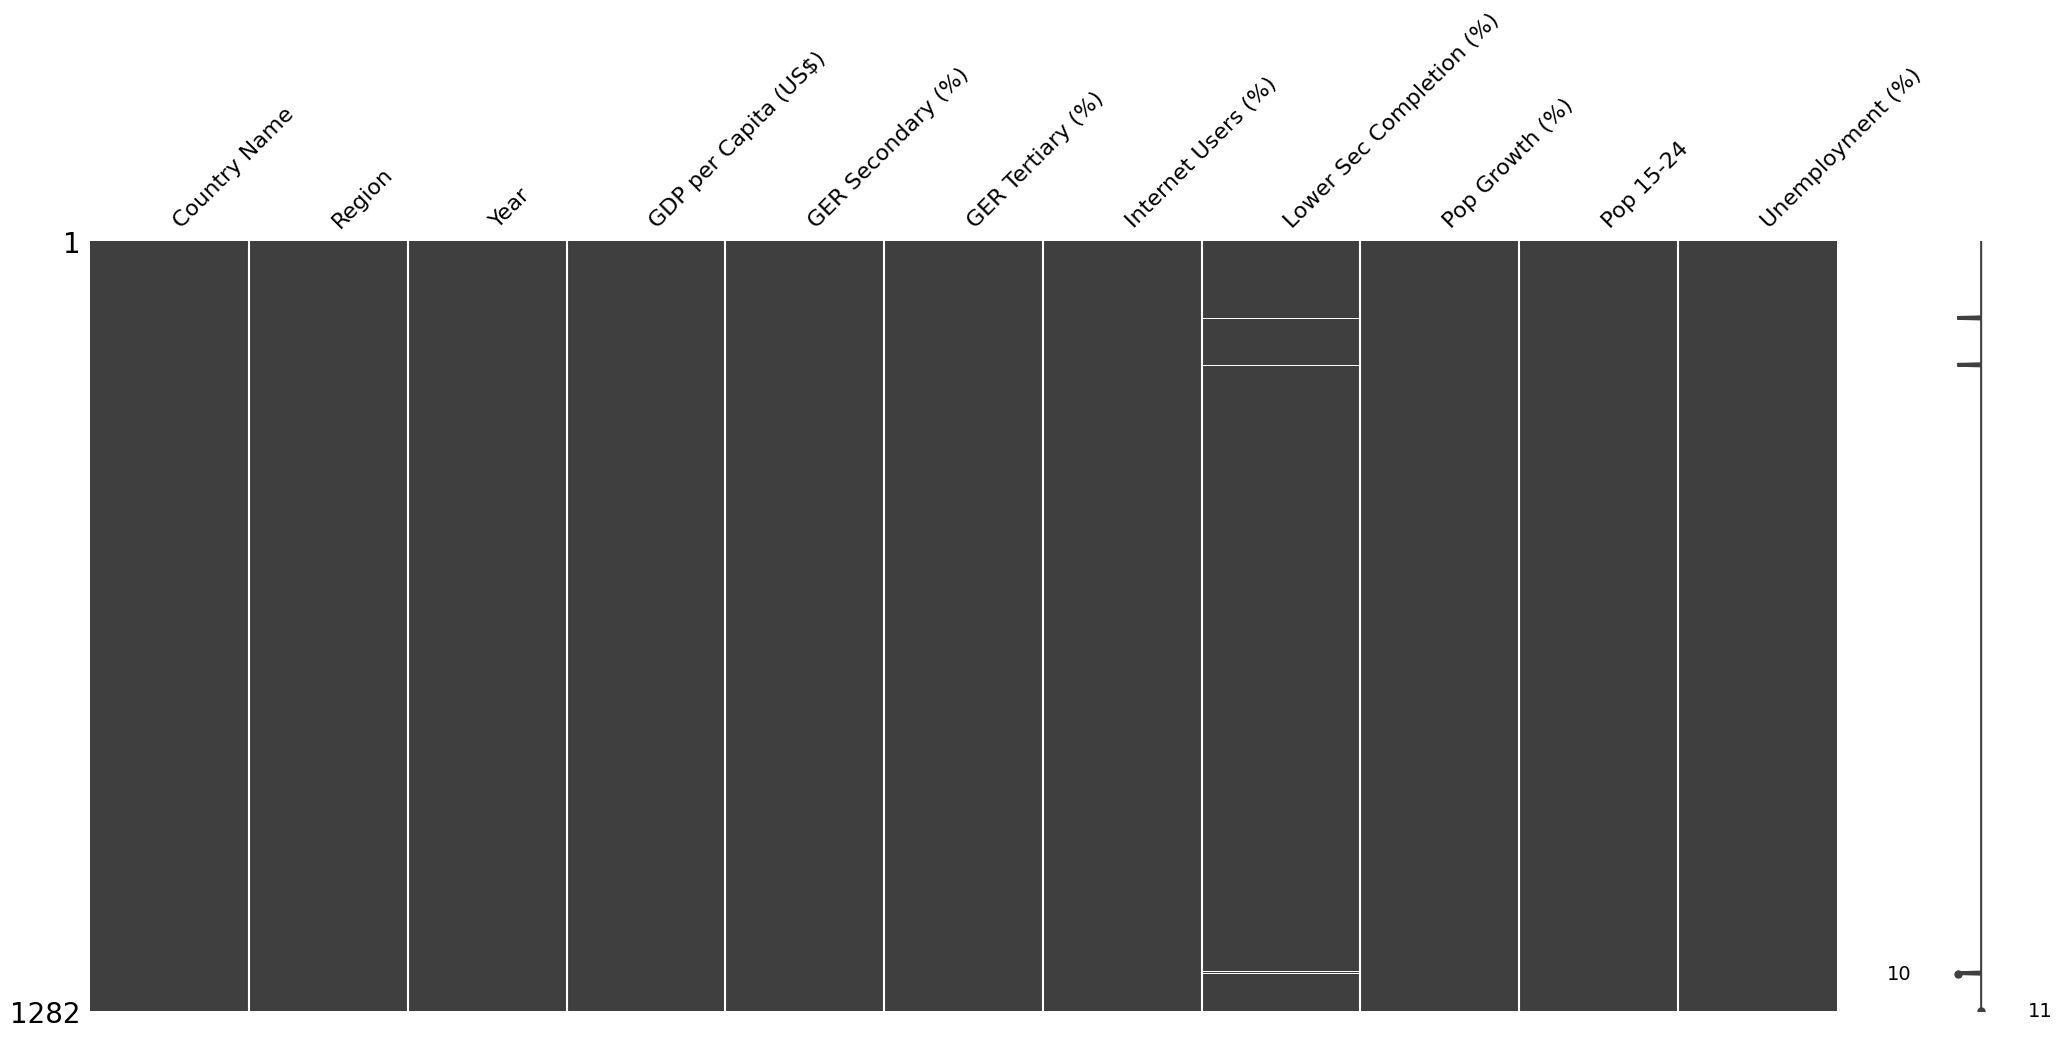

In [50]:
# Imputation des valeurs manquantes par la médiane calculée pour chaque groupe de région et année
for indicateurs in Short_name:
    Data_pivoted[indicateurs] = Data_pivoted.groupby(['Year', 'Region'])[indicateurs].transform(lambda x: x.fillna(x.median()))

# Viusalisation du taux de valeurs manquantes par indicateurs après imputation    
msno.matrix(Data_pivoted)

Il semble rester quelque données manquantes dans l'indicateur du taux de réussite dans le secondaire

In [51]:
# Affichage des lignes contenant encore des valeurs manquantes
Data_pivoted.loc[Data_pivoted.isnull().any(axis=1), :]

,Country Name,Region,Year,GDP per Capita (US$),GER Secondary (%),GER Tertiary (%),Internet Users (%),Lower Sec Completion (%),Pop Growth (%),Pop 15-24,Unemployment (%)
126,Bermuda,North America,2000,56284.168648,97.346066,63.509949,42.949860,NaN,0.894183,6767.0,5.4
129,Bermuda,North America,2009,88463.312816,99.040730,32.110950,83.250000,NaN,0.556126,24670267.5,8.8
204,Canada,North America,2000,24124.169175,101.520088,58.883591,51.300000,NaN,0.882999,4128100.0,6.8
207,Canada,North America,2009,40773.454364,102.663208,60.346346,80.300000,NaN,1.144840,4485153.0,8.3
1216,United States,North America,2000,36449.855116,93.172043,68.136307,43.079163,NaN,1.112769,39234056.0,4.0
1219,United States,North America,2009,47001.555350,95.418251,88.581741,71.000000,NaN,0.876651,44855382.0,9.3


Les données manquantes ne concerne que la région Amérique du Nord. 

# Analyses Descriptives


## Tableau

Pour savoir dans quelle région il peut être intéressant de développer des formations en ligne on va regarder différentes mesures statistiques qu'on va calculer sur l'année la plus récente pour laquelle on a des données soit l'année 2015. 

In [52]:
# Filtre de la dataframe pour calcules les mesures statistiques sur l'année 2015
Data_pivoted_2015=Data_pivoted[Data_pivoted['Year']==2015].copy()

# Reformatage de la table pour regrouper les indicateurs dans une même variable
Data_pivoted_melt = Data_pivoted_2015.melt(id_vars=['Country Name', 'Region'], value_vars=Short_name, 
                        var_name='Relevant_indicator', value_name='valeur')

# Construction d'un tableau répertoriant les différentes mesures statistiques des indicateurs
Data_desc = Data_pivoted_melt.groupby(['Region', 'Relevant_indicator']).agg(
    mean=('valeur', 'mean'),
    std=('valeur', 'std'),
    Q25=('valeur', lambda x: x.quantile(0.25)),
    Q50=('valeur', lambda x: x.quantile(0.50)), 
    Q75=('valeur', lambda x: x.quantile(0.75)),
    Nb_Country=('Country Name', 'nunique')  
).round(2).reset_index()

# Affichage du tableau
Data_desc

,Region,Relevant_indicator,mean,std,Q25,Q50,Q75,Nb_Country
0,East Asia & Pacific,GDP per Capita (US$),14510.49,18979.28,2860.21,4149.41,19541.70,36
1,East Asia & Pacific,GER Secondary (%),90.53,12.16,91.46,91.46,91.46,36
2,East Asia & Pacific,GER Tertiary (%),40.74,16.87,37.12,37.12,37.12,36
3,East Asia & Pacific,Internet Users (%),46.80,26.03,22.26,42.60,71.68,36
4,East Asia & Pacific,Lower Sec Completion (%),91.40,11.23,93.78,93.78,93.78,36
5,East Asia & Pacific,Pop 15-24,9649689.00,33087447.68,450078.25,1493722.00,4350671.50,36
6,East Asia & Pacific,Pop Growth (%),1.12,0.66,0.54,1.00,1.66,36
7,East Asia & Pacific,Unemployment (%),5.78,5.83,3.25,4.50,6.15,36
8,Europe & Central Asia,GDP per Capita (US$),27864.45,30309.96,6432.67,17155.87,42419.57,57
9,Europe & Central Asia,GER Secondary (%),106.94,15.07,101.21,103.68,107.12,57


Afin de pouvoir mieux décrire ce tableau et comparer les différentes régions entre elles on va représenter ces données sous formes de graphiques.
- on va tout d'abord regarder la distribution du nombre de pays par région
- on va ensuite regarder la distrubtion des données des différents indicateurs obtenus en 2015 entre les différentes régions
- on va ensuite regarder l'évolution des différents indicateurs sur une période allant de 2000 a 2015

## Graphiques

### Nombre de pays par régions

Text(0, 0.5, '')

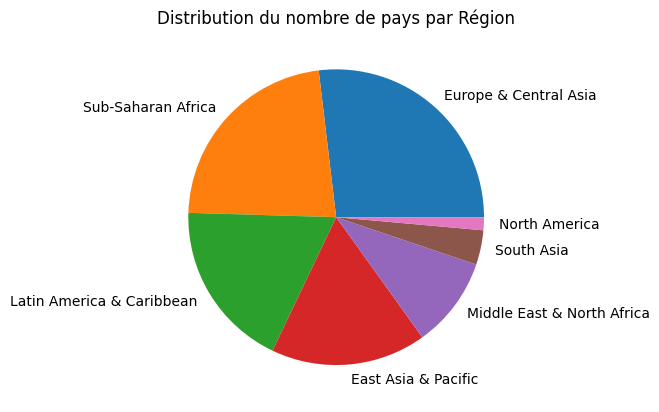

In [53]:
# Visualisation de la distribution de la variable région
Data_pivoted_2015["Region"].value_counts(normalize=True).plot(kind='pie')
plt.title("Distribution du nombre de pays par Région")
plt.ylabel("") 

La taille des régions est variable. On a des grosses régions qui contiennent beaucoup de pays (ex: L'Europe et l'Asie centrale) et des petites régions qui contiennent peu de pays (ex: L'Amérique du Nord). On va garder ce découpage, car il permet de regrouper des pays qui globalement se ressemblent sur différents points de vue. 

In [54]:
# Définition d'un dictionnaire pour conserver la même correspondance entre les couleurs et les régions pour les prochains graphiques
Colors_region = {'Sub-Saharan Africa' : 'orange', 
                 'Europe & Central Asia':'blue',
                 'North America': "pink",
                 'South Asia': 'brown',
                 'Middle East & North Africa' : 'purple',
                 'East Asia & Pacific' : 'red',
                 'Latin America & Caribbean' : 'green'}

### Fonctions

In [55]:
def evolution_indicator(df, variable):
    
    """
    Génère un graphique montrant l'évolution moyenne annuelle d'un indicateur par région
    à partir d'une dataframe contenant des données pays/régions/années, et sauvegarde les
    données moyennes par région et par année dans un fichier Excel.

    Paramètres
     - df (pandas.DataFrame): DataFrame contenant au moins les colonnes 
     'Country Name', 'Region', 'Year' et la variable d'intérêt.
     - variable (str): Le nom de la colonne dans df correspondant à l'indicateur à analyser.
    """
    
    # Selection des variables nécéssaires au graphique
    df_filtered = df[['Country Name', 'Region', 'Year', variable]]
    
    # Calcul de la moyenne de chacun des indicateurs par région et par année
    df_mean = df_filtered.groupby(['Year', 'Region'], as_index=False)[variable].mean()
    
    # Sauvegarde de la table de données
    df_mean.to_excel(f'../Output/Tab_Evolution/Evolution  {variable}.xlsx', index=False)
    
    # Construction du graphique 
    plt.figure(figsize=(10, 5))
    sns.lineplot(data=df_mean, x='Year', y=variable, hue='Region', marker='o', palette=Colors_region)
    plt.title(f"Évolution du {variable} moyen par région", fontsize=15)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel("Année", fontsize=14)
    plt.ylabel(f"Moyenne du {variable}", fontsize=14)
    plt.legend(title="Région", loc='upper left', bbox_to_anchor=(1, 1))
    plt.grid(True)
    plt.show()


In [56]:
def boxplot(df, variable, annee=2015):
    
    """
    Affiche un diagramme en boîte (boxplot) de la distribution d'un indicateur donné
    pour différentes régions à une année spécifiée, et sauvegarde le graphique en PNG.

    Paramètres
     - df (pandas.DataFrame): DataFrame contenant au minimum les colonnes 'Country Name', 'Region', 'Year' et la variable d'intérêt.
     - variable (str):Nom de la colonne dans `df` correspondant à l'indicateur à analyser.
     - annee (int optionnel, défaut=2015):Année pour laquelle on souhaite visualiser la distribution de l'indicateu
    """
    
    # Selection des variables nécéssaires au graphique
    df_filtered = df[['Country Name', 'Region', 'Year', variable]]
    
    # Filtre de la dataframe sur l'année qu'on veut regarder, par défaut 2015
    df_filtered_annee = df_filtered[df_filtered['Year'] == annee]
    
    # Construction du graphique 
    plt.figure(figsize=(6.5, 6.5))
    sns.boxplot(x="Region", y=variable, hue="Region", data=df_filtered_annee,  palette=Colors_region)
    plt.yticks(fontsize=12)
    plt.xticks(rotation=45, fontsize=12, ha="right")
    plt.title(f"{variable} per region for {annee}", fontsize=15)
    plt.xlabel('Region', fontsize=14)
    plt.ylabel(f"{variable}", fontsize=14)
    plt.tight_layout()
    plt.savefig(f'../Output/Boxplot/Boxplot {variable}.png', format='png')
    plt.show()
    

In [57]:
def show_outlier(df, df2, variable, annee=2015):
    
    """
    Identifie et retourne les valeurs aberrantes (outliers) pour un indicateur donné
    dans chaque région à une année spécifiée, en utilisant la méthode de l'IQR (Interquartile Range).

    Paramètres
     - df (pandas.DataFrame): DataFrame contenant les données principales avec au minimum les colonnes
        'Country Name', 'Region', 'Year' et la variable d'intérêt.
     - df2 (pandas.DataFrame): DataFrame descriptive contenant les statistiques résumées par région, 
        notamment les quantiles Q25 et Q75, avec une colonne 'Relevant_indicator'
        indiquant pour quel indicateur chaque ligne correspond.
     - variable (str): Nom de la colonne dans `df` correspondant à l'indicateur à analyser.
     - annee (int, optionnel, défaut=2015): Année pour laquelle on souhaite identifier les outliers.

    Retour
     - pandas.DataFrame : Sous-ensemble de df (filtré sur l'année) contenant uniquement les observations
        considérées comme outliers selon la règle IQR par région

    """
    
    # Selection des variables nécéssaires 
    df_filtered = df[['Country Name', 'Region', 'Year', variable]]
    
    # Filtre de la dataframe sur l'année qu'on veut regarder, par défaut 2015
    df_filtered_annee = df_filtered[df_filtered['Year'] == annee]
    
    # Filre de la table descriptive sur la variable qu'on souhaite analyser
    Data_desc_filtered = df2[df2['Relevant_indicator']==variable]
    
    # Ajout des mesures statistiques dans la table de données
    df_filtered_annee_annot = pd.merge(df_filtered_annee, Data_desc_filtered, on='Region', how='left')
     
    # Calcule de l'IQR
    df_filtered_annee_annot['IQR'] = df_filtered_annee_annot['Q75'] - df_filtered_annee_annot['Q25']
    
    # Filte de la table de données pour ne garder que les outliers    
    df_final = df_filtered_annee_annot[(df_filtered_annee_annot[variable] < df_filtered_annee_annot['Q25'] - 1.5*df_filtered_annee_annot['IQR']) |
                                 (df_filtered_annee_annot[variable] > df_filtered_annee_annot['Q75'] + 1.5*df_filtered_annee_annot['IQR'])]
    
    return df_final
    

### Pourcentage d'utilisateurs d'internet par Région

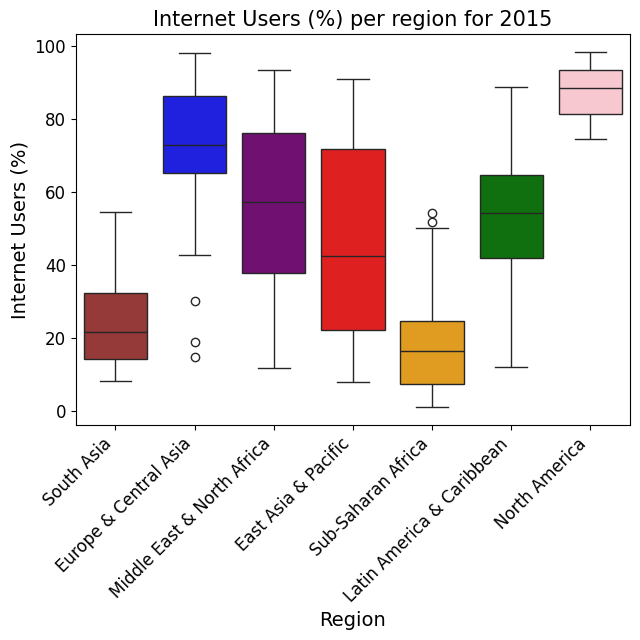

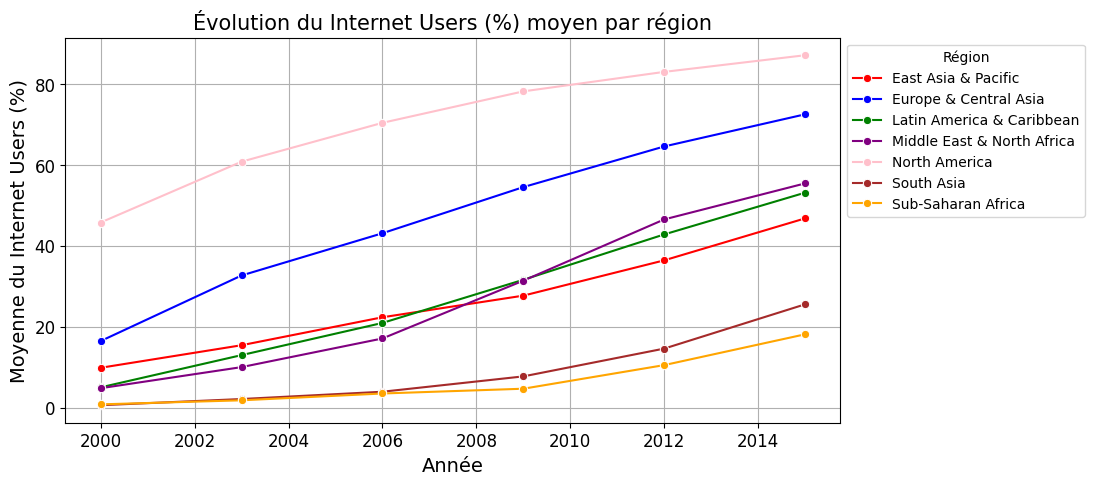

,Country Name,Region,Year,Internet Users (%),Relevant_indicator,mean,std,Q25,Q50,Q75,Nb_Country,IQR
103,Kyrgyz Republic,Europe & Central Asia,2015,30.247043,Internet Users (%),72.52,18.35,65.32,72.9,86.42,57,21.10
164,Seychelles,Sub-Saharan Africa,2015,54.259618,Internet Users (%),18.15,14.00,7.37,16.5,24.62,48,17.25
172,South Africa,Sub-Saharan Africa,2015,51.919116,Internet Users (%),18.15,14.00,7.37,16.5,24.62,48,17.25
185,Tajikistan,Europe & Central Asia,2015,18.980000,Internet Users (%),72.52,18.35,65.32,72.9,86.42,57,21.10
194,Turkmenistan,Europe & Central Asia,2015,14.996775,Internet Users (%),72.52,18.35,65.32,72.9,86.42,57,21.10


In [58]:
# Appel des trois fonctions d'analyse
boxplot(Data_pivoted, 'Internet Users (%)')
evolution_indicator(Data_pivoted, 'Internet Users (%)')
show_outlier(Data_pivoted, Data_desc, 'Internet Users (%)')

Le taux d'utilisation d'internet est variable entre les régions et également au sein même de certaines régions. Cette représentation indique un certains nombre de pays dont le taux d'utilisation d'internet est inférieur à 50%. Ces pays là ne seront pas intéressant pour développer des formations en lignes. Peu d'outliers ont été identifiés mais ces derniers ne paraissent pas aberrants.   
Le taux d'utilisation d'internet n'a céssé d'augmenter au cours du temps pour chacune des régions ce qui est un bon point pour le projet d'extension d'Academy

### Population, ages 15-24

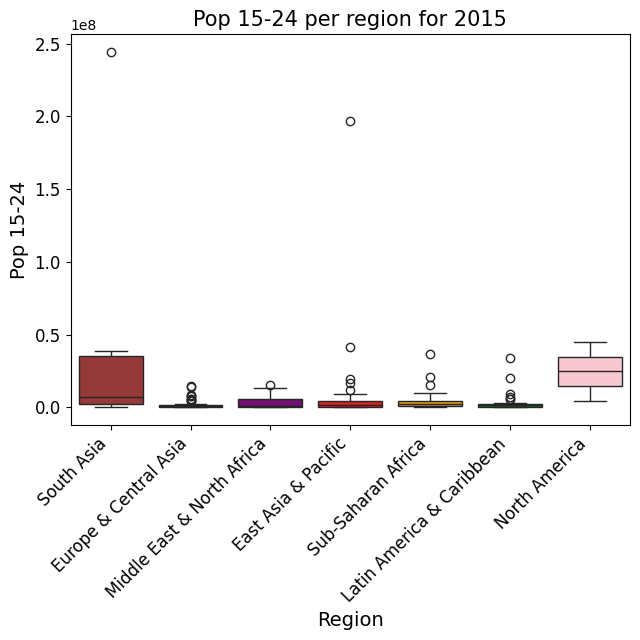

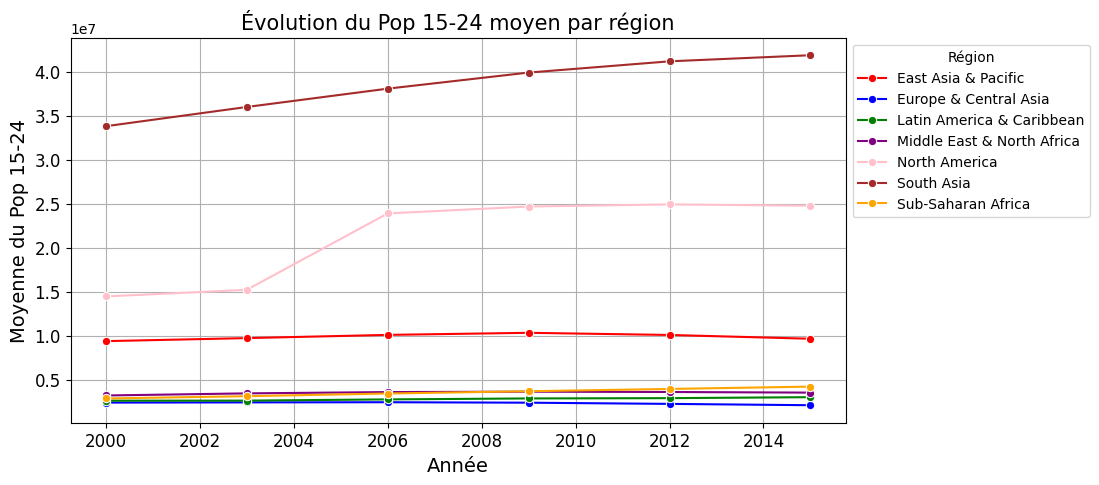

,Country Name,Region,Year,Pop 15-24,Relevant_indicator,mean,std,Q25,Q50,Q75,Nb_Country,IQR
7,Argentina,Latin America & Caribbean,2015,6886530.0,Pop 15-24,3011177.82,6168245.63,356577.50,1363506.0,2162040.50,39,1805463.00
26,Brazil,Latin America & Caribbean,2015,33595574.0,Pop 15-24,3011177.82,6168245.63,356577.50,1363506.0,2162040.50,39,1805463.00
40,China,East Asia & Pacific,2015,197026759.0,Pop 15-24,9649689.00,33087447.68,450078.25,1493722.0,4350671.50,36,3900593.25
41,Colombia,Latin America & Caribbean,2015,8999338.0,Pop 15-24,3011177.82,6168245.63,356577.50,1363506.0,2162040.50,39,1805463.00
43,"Congo, Dem. Rep.",Sub-Saharan Africa,2015,15535095.0,Pop 15-24,4210892.19,6334799.71,685966.25,2296726.5,4519916.25,48,3833950.00
56,"Egypt, Arab Rep.",Middle East & North Africa,2015,15377746.0,Pop 15-24,3530032.52,4389639.11,583565.00,1211599.0,5995687.00,21,5412122.00
61,Ethiopia,Sub-Saharan Africa,2015,21074230.0,Pop 15-24,4210892.19,6334799.71,685966.25,2296726.5,4519916.25,48,3833950.00
65,France,Europe & Central Asia,2015,7567872.0,Pop 15-24,2097680.24,3073085.76,580379.00,1049138.5,1544146.00,57,963767.00
70,Germany,Europe & Central Asia,2015,8682394.0,Pop 15-24,2097680.24,3073085.76,580379.00,1049138.5,1544146.00,57,963767.00
85,India,South Asia,2015,244120201.0,Pop 15-24,41859062.88,83148666.10,2277826.50,7032757.5,35570648.25,8,33292821.75


In [59]:
# Appel des trois fonctions d'analyse
boxplot(Data_pivoted, 'Pop 15-24')
evolution_indicator(Data_pivoted, 'Pop 15-24')
show_outlier(Data_pivoted, Data_desc, 'Pop 15-24')

L'étude de la distribution de la population de jeunes permet d'identifier deux pays qui sortent du lot et qui ont une forte population qui constitue un marché important. Ces deux pays correspondant à l'Inde et la Chine ces fortes valeurs ne sont pas aberrantes.   
La population mondiale est restée plutôt stable pour la plupart des régions entre 2000 et 2015 mais augmente pour l'Asie du sud et pour l'Amérique du Nord.

### Population growth (annual %)

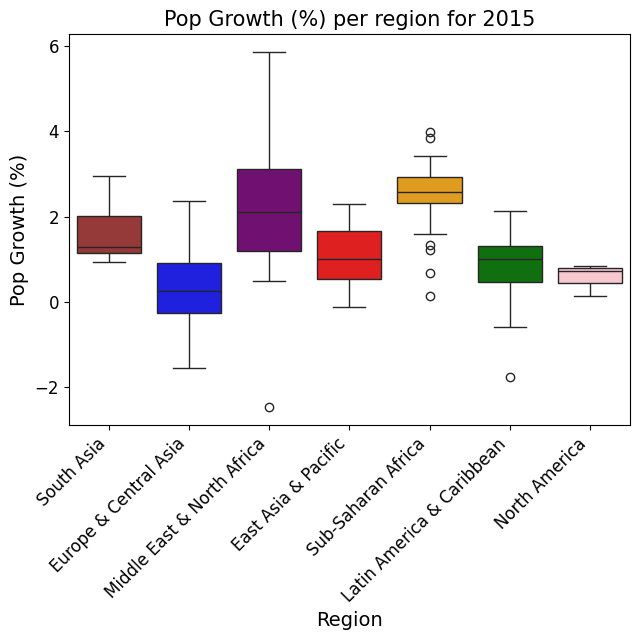

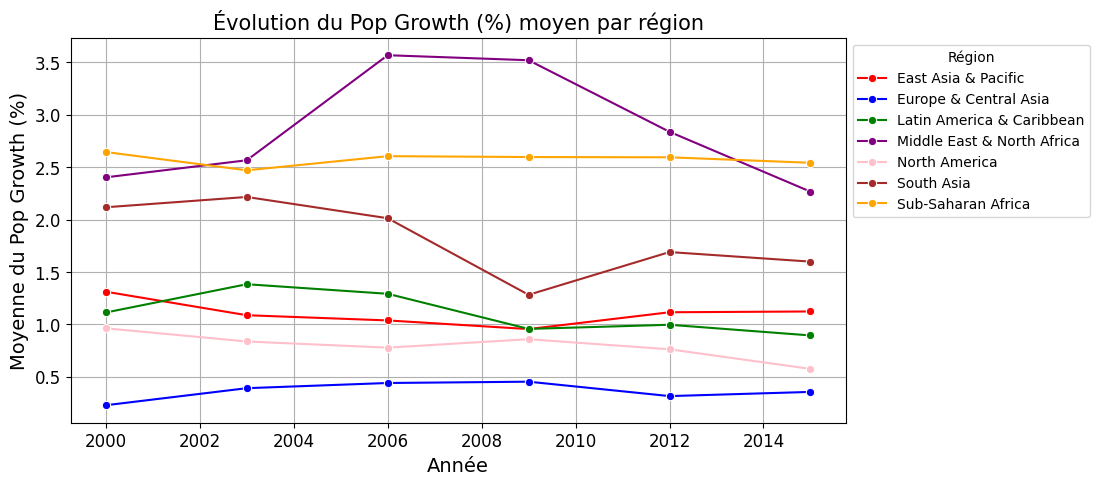

,Country Name,Region,Year,Pop Growth (%),Relevant_indicator,mean,std,Q25,Q50,Q75,Nb_Country,IQR
31,Cabo Verde,Sub-Saharan Africa,2015,1.222652,Pop Growth (%),2.54,0.70,2.33,2.58,2.92,48,0.59
36,Central African Republic,Sub-Saharan Africa,2015,0.677772,Pop Growth (%),2.54,0.70,2.33,2.58,2.92,48,0.59
58,Equatorial Guinea,Sub-Saharan Africa,2015,3.989139,Pop Growth (%),2.54,0.70,2.33,2.58,2.92,48,0.59
107,Lesotho,Sub-Saharan Africa,2015,1.335998,Pop Growth (%),2.54,0.70,2.33,2.58,2.92,48,0.59
123,Mauritius,Sub-Saharan Africa,2015,0.132433,Pop Growth (%),2.54,0.70,2.33,2.58,2.92,48,0.59
139,Niger,Sub-Saharan Africa,2015,3.835750,Pop Growth (%),2.54,0.70,2.33,2.58,2.92,48,0.59
153,Puerto Rico,Latin America & Caribbean,2015,-1.760677,Pop Growth (%),0.90,0.72,0.47,1.01,1.32,39,0.85
184,Syrian Arab Republic,Middle East & North Africa,2015,-2.467847,Pop Growth (%),2.27,1.75,1.20,2.12,3.12,21,1.92


In [60]:
# Appel des trois fonctions d'analyse
boxplot(Data_pivoted, 'Pop Growth (%)')
evolution_indicator(Data_pivoted, 'Pop Growth (%)')
show_outlier(Data_pivoted, Data_desc, 'Pop Growth (%)')

La croissance de la population est majoritairement positive pour l'ensemble des pays et régions. Certaines régions qui avaient une petite population (Moyen Orient et Afrique du Nord ainsi que l'Afrique Sub-Saharienne) ont une croissance plus élevée ce qui est interessant car ces pays là constitueront peut être un marché plus favorable dans les prochaines années. Cependant en regardant l'évolution au cours du temps on remarque que cet indicateur là a beaucoup diminué depuis 2009 pour l'Afrique du Nord et le Moyen Orient.

### Chômage

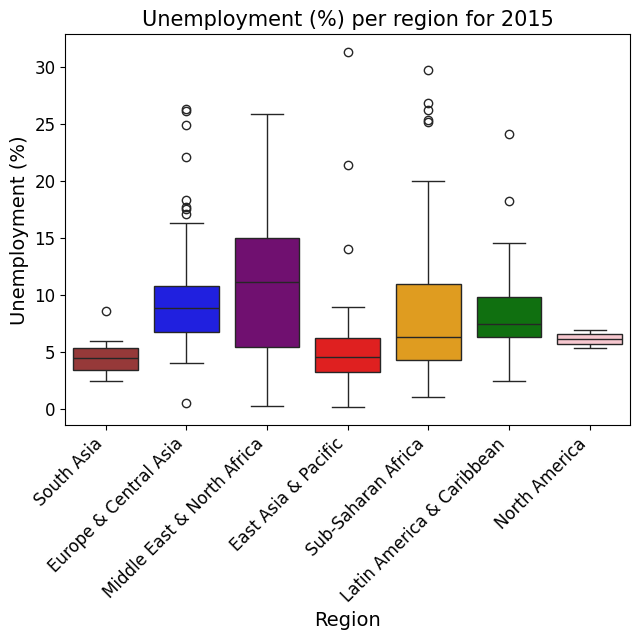

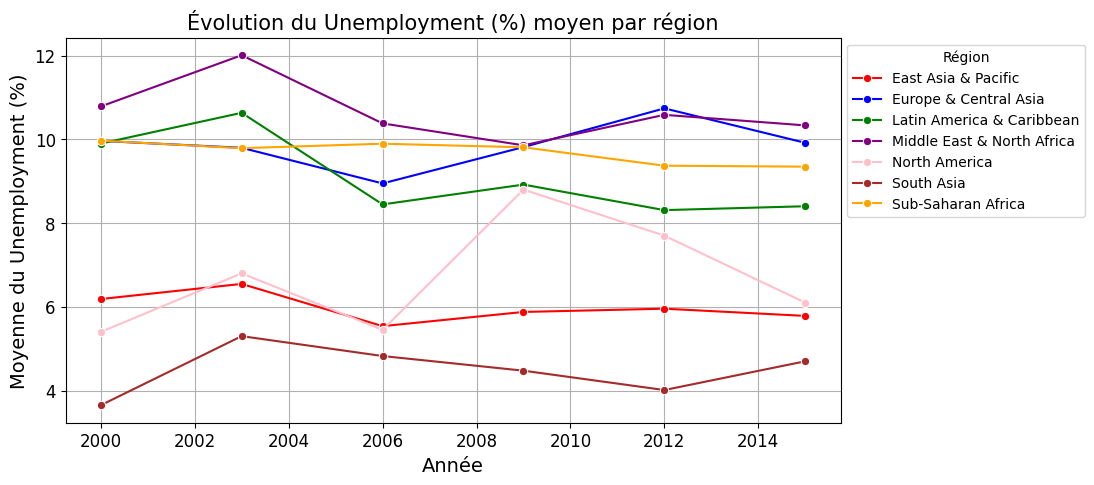

,Country Name,Region,Year,Unemployment (%),Relevant_indicator,mean,std,Q25,Q50,Q75,Nb_Country,IQR
0,Afghanistan,South Asia,2015,8.600000,Unemployment (%),4.70,1.93,3.43,4.45,5.30,8,1.87
1,Albania,Europe & Central Asia,2015,17.100000,Unemployment (%),9.92,5.52,6.70,8.80,10.80,57,4.10
8,Armenia,Europe & Central Asia,2015,18.299999,Unemployment (%),9.92,5.52,6.70,8.80,10.80,57,4.10
17,Belarus,Europe & Central Asia,2015,0.500000,Unemployment (%),9.92,5.52,6.70,8.80,10.80,57,4.10
24,Bosnia and Herzegovina,Europe & Central Asia,2015,26.299999,Unemployment (%),9.92,5.52,6.70,8.80,10.80,57,4.10
66,French Polynesia,East Asia & Pacific,2015,21.400000,Unemployment (%),5.78,5.83,3.25,4.50,6.15,36,2.90
68,"Gambia, The",Sub-Saharan Africa,2015,29.700001,Unemployment (%),9.35,7.57,4.25,6.25,10.93,48,6.68
72,Greece,Europe & Central Asia,2015,24.900000,Unemployment (%),9.92,5.52,6.70,8.80,10.80,57,4.10
107,Lesotho,Sub-Saharan Africa,2015,26.799999,Unemployment (%),9.35,7.57,4.25,6.25,10.93,48,6.68
114,"Macedonia, FYR",Europe & Central Asia,2015,26.100000,Unemployment (%),9.92,5.52,6.70,8.80,10.80,57,4.10


In [61]:
# Appel des trois fonctions d'analyse
boxplot(Data_pivoted, 'Unemployment (%)')
evolution_indicator(Data_pivoted, 'Unemployment (%)')
show_outlier(Data_pivoted, Data_desc, 'Unemployment (%)')

Le taux de chômage est assez variable au sein de certaines régions. Certains pays atteignent des valeurs particulièrement élevées comme en Espagne où il s'élève à 22% mais des valeurs similaires peuvent être retrouvées dans d'autres sources de données. 
L'évolution du taux de chômage au cours du temps est également assez variable entre les régions et au cours du temps. 

### Gross enrolment ratio, secondary, both sexes (%)


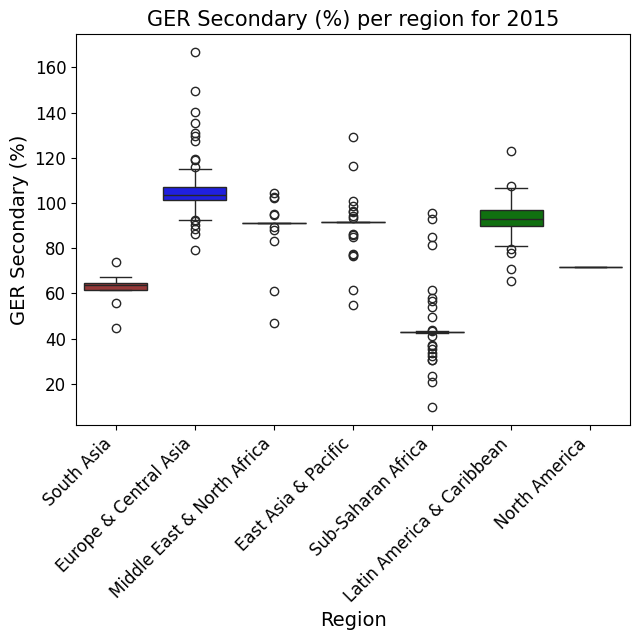

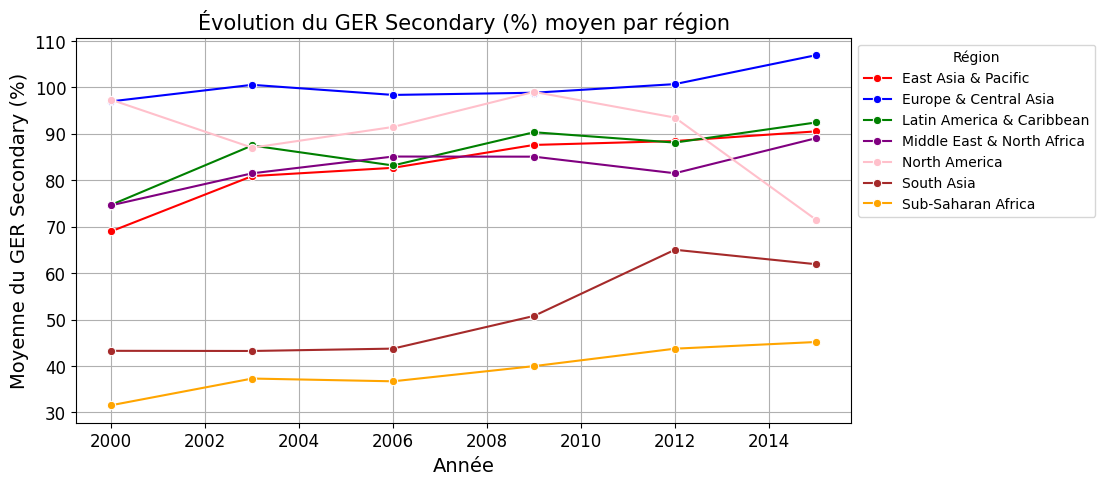

,Country Name,Region,Year,GER Secondary (%),Relevant_indicator,mean,std,Q25,Q50,Q75,Nb_Country,IQR
0,Afghanistan,South Asia,2015,55.644409,GER Secondary (%),61.93,8.66,61.55,63.52,64.44,8,2.89
2,Algeria,Middle East & North Africa,2015,91.172493,GER Secondary (%),89.06,12.80,91.17,91.17,91.17,21,0.00
3,American Samoa,East Asia & Pacific,2015,91.462334,GER Secondary (%),90.53,12.16,91.46,91.46,91.46,36,0.00
8,Armenia,Europe & Central Asia,2015,88.502357,GER Secondary (%),106.94,15.07,101.21,103.68,107.12,57,5.91
10,Australia,East Asia & Pacific,2015,91.462334,GER Secondary (%),90.53,12.16,91.46,91.46,91.46,36,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
201,United States,North America,2015,71.542412,GER Secondary (%),71.54,0.00,71.54,71.54,71.54,3,0.00
204,Vanuatu,East Asia & Pacific,2015,54.815842,GER Secondary (%),90.53,12.16,91.46,91.46,91.46,36,0.00
206,Vietnam,East Asia & Pacific,2015,91.462334,GER Secondary (%),90.53,12.16,91.46,91.46,91.46,36,0.00
208,West Bank and Gaza,Middle East & North Africa,2015,82.996231,GER Secondary (%),89.06,12.80,91.17,91.17,91.17,21,0.00


In [62]:
boxplot(Data_pivoted,  'GER Secondary (%)')
evolution_indicator(Data_pivoted, 'GER Secondary (%)')
show_outlier(Data_pivoted, Data_desc,  'GER Secondary (%)')

Le taux d'inscription dans le secondaire apparait plus élevé en Europe et en Asie centrale que dans les autres régions démontrant un accès à l'éducation plus développés dans les pays européens et d'Asie centrale. A l'inverse, l'acces à l'éducation dans le secondaire apparait plus limité dans les pays de l'Afrique Sub-Saharienne. On remarque que cet indicateur est en train d'augmenter pour la plupart des régions. On note également une forte quantité d'outlier pour le taux d'inscription dans le secondaire dans chacune des régions.

### Gross enrolment ratio, tertiary, both sexes (%)

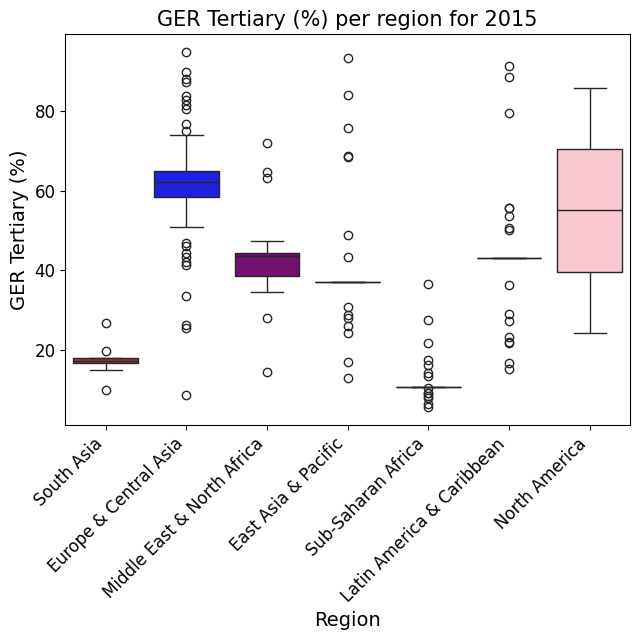

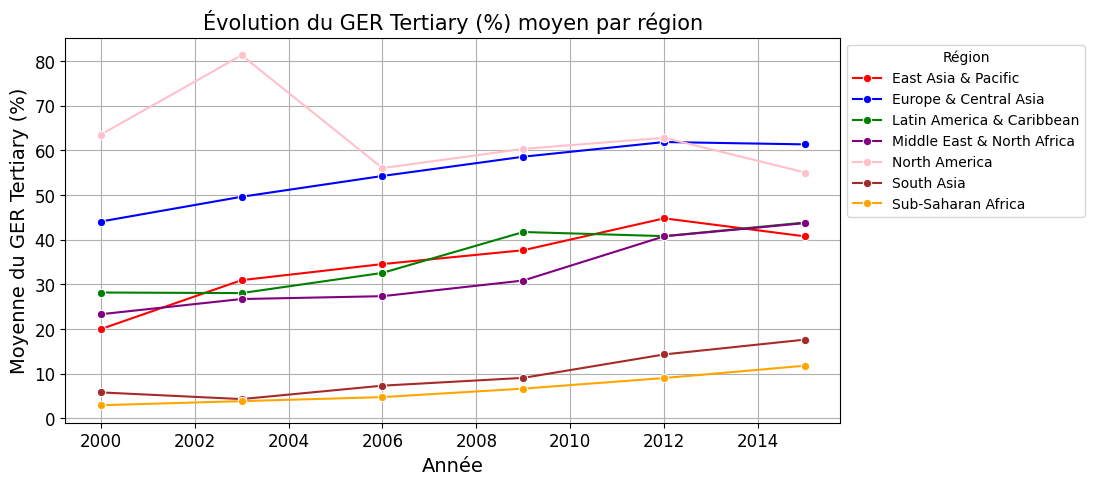

,Country Name,Region,Year,GER Tertiary (%),Relevant_indicator,mean,std,Q25,Q50,Q75,Nb_Country,IQR
3,American Samoa,East Asia & Pacific,2015,37.118275,GER Tertiary (%),40.74,16.87,37.12,37.12,37.12,36,0.00
5,Angola,Sub-Saharan Africa,2015,9.308020,GER Tertiary (%),11.79,5.01,10.63,10.63,10.63,48,0.00
6,Antigua and Barbuda,Latin America & Caribbean,2015,43.198395,GER Tertiary (%),43.85,15.78,43.20,43.20,43.20,39,0.00
7,Argentina,Latin America & Caribbean,2015,43.198395,GER Tertiary (%),43.85,15.78,43.20,43.20,43.20,39,0.00
8,Armenia,Europe & Central Asia,2015,44.309502,GER Tertiary (%),61.35,15.76,58.29,62.09,64.97,57,6.68
...,...,...,...,...,...,...,...,...,...,...,...,...
205,"Venezuela, RB",Latin America & Caribbean,2015,43.198395,GER Tertiary (%),43.85,15.78,43.20,43.20,43.20,39,0.00
206,Vietnam,East Asia & Pacific,2015,28.835649,GER Tertiary (%),40.74,16.87,37.12,37.12,37.12,36,0.00
207,Virgin Islands (U.S.),Latin America & Caribbean,2015,43.198395,GER Tertiary (%),43.85,15.78,43.20,43.20,43.20,39,0.00
210,Zambia,Sub-Saharan Africa,2015,10.625960,GER Tertiary (%),11.79,5.01,10.63,10.63,10.63,48,0.00


In [63]:
# Appel des trois fonctions d'analyse
boxplot(Data_pivoted,  'GER Tertiary (%)')
evolution_indicator(Data_pivoted, 'GER Tertiary (%)')
show_outlier(Data_pivoted, Data_desc,  'GER Tertiary (%)')

L'Asie du Sud et l'Afrique Sub-Saharienne ont majoritairement des taux d'inscription dans l'enseignemnet supérieur plus faible que les autres régions montrant un accès à l'éducation dans l'enseignement supérieur plus limité que dans les autres régions.
On remarque que cet indicateur est en train d'augmenter pour la plupart des régions. On note une forte quantité d'outlier pour le taux d'inscription dans l'enseignement supérieur dans chacune des régions

### GDP per capita (current US$)

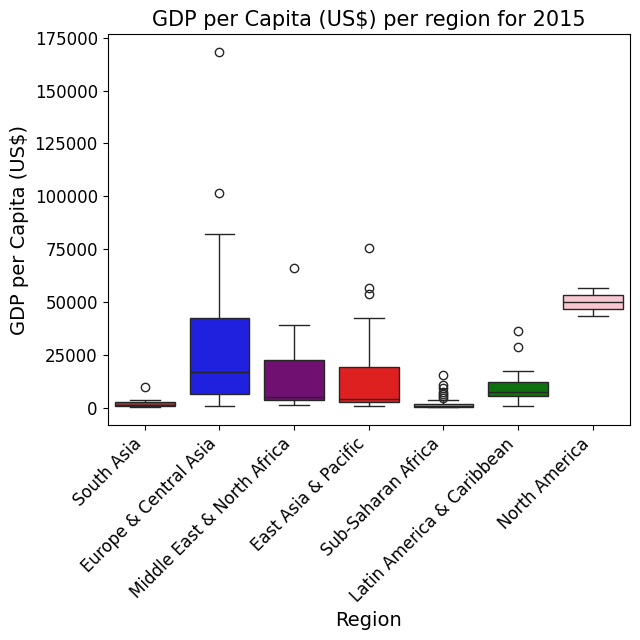

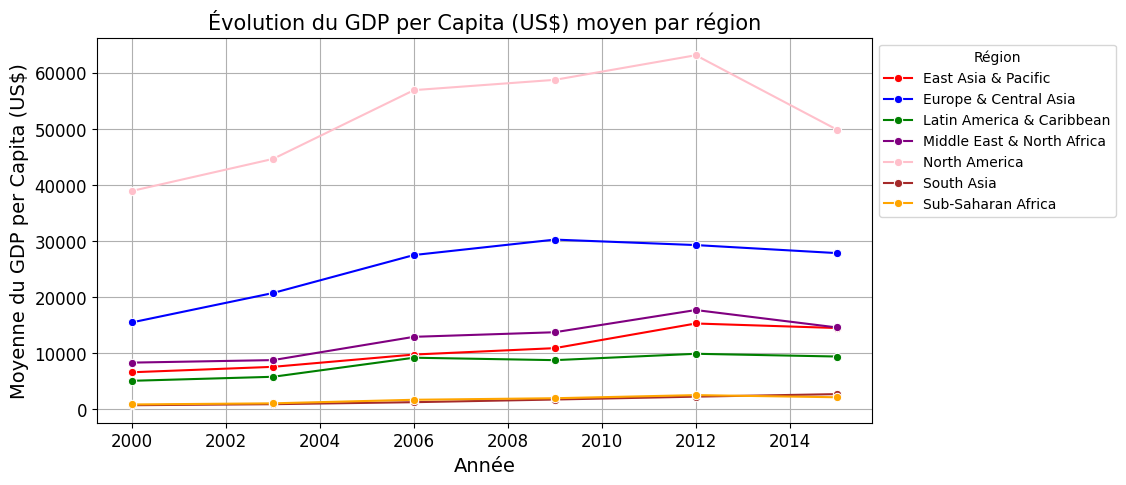

,Country Name,Region,Year,GDP per Capita (US$),Relevant_indicator,mean,std,Q25,Q50,Q75,Nb_Country,IQR
10,Australia,East Asia & Pacific,2015,56554.038761,GDP per Capita (US$),14510.49,18979.28,2860.21,4149.41,19541.70,36,16681.49
13,"Bahamas, The",Latin America & Caribbean,2015,29056.090663,GDP per Capita (US$),9428.25,6923.95,5485.09,7602.26,12270.20,39,6785.11
25,Botswana,Sub-Saharan Africa,2015,6532.044677,GDP per Capita (US$),2165.84,3058.77,582.74,891.53,1912.56,48,1329.82
58,Equatorial Guinea,Sub-Saharan Africa,2015,10717.482176,GDP per Capita (US$),2165.84,3058.77,582.74,891.53,1912.56,48,1329.82
67,Gabon,Sub-Saharan Africa,2015,7388.984144,GDP per Capita (US$),2165.84,3058.77,582.74,891.53,1912.56,48,1329.82
110,Liechtenstein,Europe & Central Asia,2015,168146.015281,GDP per Capita (US$),27864.45,30309.96,6432.67,17155.87,42419.57,57,35986.90
112,Luxembourg,Europe & Central Asia,2015,101446.786303,GDP per Capita (US$),27864.45,30309.96,6432.67,17155.87,42419.57,57,35986.90
113,"Macao SAR, China",East Asia & Pacific,2015,75573.480714,GDP per Capita (US$),14510.49,18979.28,2860.21,4149.41,19541.70,36,16681.49
118,Maldives,South Asia,2015,9792.017334,GDP per Capita (US$),2725.53,3047.61,1094.41,1512.55,2922.71,8,1828.30
123,Mauritius,Sub-Saharan Africa,2015,9260.447303,GDP per Capita (US$),2165.84,3058.77,582.74,891.53,1912.56,48,1329.82


In [64]:
# Appel des trois fonctions d'analyse
boxplot(Data_pivoted, 'GDP per Capita (US$)')
evolution_indicator(Data_pivoted, 'GDP per Capita (US$)')
show_outlier(Data_pivoted, Data_desc, 'GDP per Capita (US$)')

Le PIB est variable entre les différentes régions. L'Amérique du Nord a des PIB plus élevés que les autres régions et représente ainsi une région favorable pour le développement des formations en ligne. Au contraire pour d'autres régions comme l'Asie du Sud et l'Afrique Sub-Saharienne, les PIB se concentrent dans des valeurs très basses et seront probablement moins intéressantes.  
Le PIB diminue depuis 2009-2012 pour certaines régions, il faudra prendre en compte cette évolution dans l'identification des pays à fort potentiel. 

Dans cette partie nous avons regardé les indicateurs individuellement et cela nous a permis de voir que certaines régions ou certains pays pouvait se révéler intéressant pour le projet d'extension d'Academy. Mais il est important de choisir les pays en prenant en compte l'ensemble des indicateurs. Nous allons donc dans la suite calculer un score pour chaque indicateur et chaque pays pour ensuite pouvoir attribuer une note globale à chacun des pays. Avant de passer à cette étape, il est important d'analyser la corrélation qu'il existe entre les différents indicateurs.

# Corrélation entre les variables

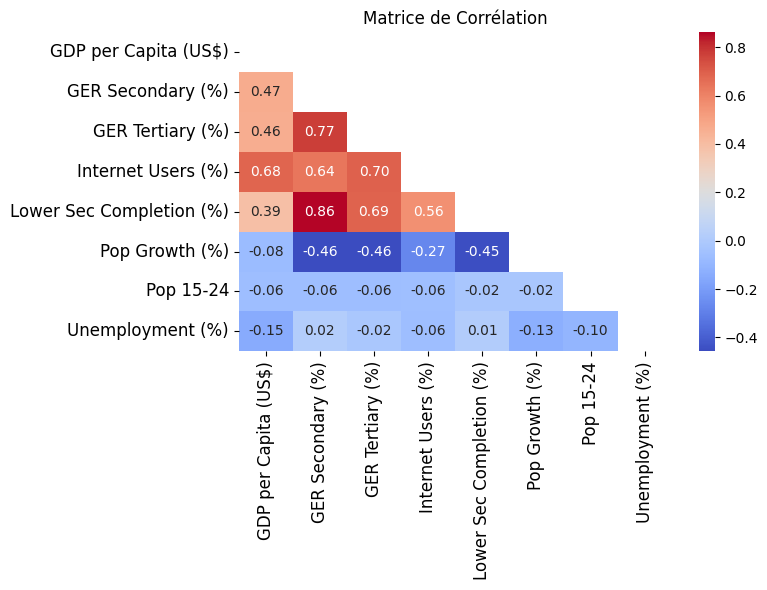

In [65]:
# Construction d'une matrice de corrélation des indicateurs
corr_matrix = Data_pivoted[Short_name].corr()

# Définition d'un mask pour n'affiquer que la diagonal inférieur de la matrice de corrélation
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Construction d'une heatmap représentant les corrélations des différents indicateurs
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, mask=mask, cmap='coolwarm', fmt='.2f')
plt.title('Matrice de Corrélation')
plt.yticks(fontsize=12)
plt.xticks(rotation=90, fontsize=12)
plt.tight_layout()
plt.savefig('../Output/Correlation/Correlation map.png', format='png')
plt.show()

On remarque de fortes corrélations entre 
- Le taux de réussite dans le secondaire et le taux d'inscription dans le secondaire -> on ne va garder qu'une des deux variables
- Le taux d'inscription dans le secondaire et le taux d'inscription dans l'enseignement supérieur -> on va regrouper ces variables

# Regroupement de variables

In [66]:
# Regroupement des variables taux d'inscription dans le secondaire et taux d'inscription dans l'enseignement secondaire
Data_pivoted_2015.loc[:, '_GER (%)'] = (Data_pivoted_2015['GER Secondary (%)'] + Data_pivoted_2015['GER Tertiary (%)']) / 2
Data_pivoted_2015.drop(columns=['GER Secondary (%)','GER Tertiary (%)', 'Lower Sec Completion (%)'], inplace=True)

# Définition d'une nouvelle liste contenant les nouveaux indicateurs
New_relevant_indicator = ['_GER (%)',
                     'Internet Users (%)',
                      'Pop 15-24', 
                      'Unemployment (%)',
                     'GDP per Capita (US$)',
                      'Pop Growth (%)']

# Scoring 

## Attribution d'un score pour chaque indicateur

Pour établir un classement des différents pays, nous allons créer un score pour attribuer une note pour chacun des pays. 
Les indicateurs présentant des outliers dans les régions, la méthode utilisée sera la méthode des quantiles qui est moins sensible à la présence d'outlier que d'autres méthode (MinMaxScaler par exemple).

In [67]:
# Création d'une nouvelle table qui contiendra les valeurs des différents scores
Data_qcut = Data_pivoted_2015[['Region', 'Country Name']].copy()

# Calculs des différents scores
for indicateur in New_relevant_indicator:
    Data_qcut[indicateur + '_score'] = pd.qcut(Data_pivoted_2015[indicateur], q=7, labels=False, duplicates='drop' ) + 1  

# Conversition de la table en data frame
Data_final = pd.DataFrame(Data_qcut)
Data_final

,Region,Country Name,_GER (%)_score,Internet Users (%)_score,Pop 15-24_score,Unemployment (%)_score,GDP per Capita (US$)_score,Pop Growth (%)_score
5,South Asia,Afghanistan,2,1,6,5,1,7
11,Europe & Central Asia,Albania,6,5,2,7,3,1
17,Middle East & North Africa,Algeria,3,3,6,6,4,5
23,East Asia & Pacific,American Samoa,3,3,4,2,5,2
29,Europe & Central Asia,Andorra,6,7,3,5,7,1
...,...,...,...,...,...,...,...,...
1257,Latin America & Caribbean,Virgin Islands (U.S.),4,4,4,5,7,1
1263,Middle East & North Africa,West Bank and Gaza,3,5,3,7,3,7
1269,Middle East & North Africa,"Yemen, Rep.",4,2,6,7,2,6
1275,Sub-Saharan Africa,Zambia,1,2,5,5,2,7


L'entreprise aura intérêt à s'étendre dans ce pays si celui ci a
- Un fort taux d'inscription dans le secondaire ou le tertiaire
- Un fort pourcentage d'utilisateurs d'internet
- Une population de jeunes entre 15 et 24 ans élevée
- Un fort taux de chômage
- Un fort PIB
- Une croissance élevée

L'utilisation d'internet, le PIB du pays ainsi que la croissance nous paraissent plus impactant nous allons donc leur associé un poids plus fort pour le calcule de la note finale.

## Calcul du score total

In [68]:
# Affichage des 5 premières lignes de la table
Data_final.head()

,Region,Country Name,_GER (%)_score,Internet Users (%)_score,Pop 15-24_score,Unemployment (%)_score,GDP per Capita (US$)_score,Pop Growth (%)_score
5,South Asia,Afghanistan,2,1,6,5,1,7
11,Europe & Central Asia,Albania,6,5,2,7,3,1
17,Middle East & North Africa,Algeria,3,3,6,6,4,5
23,East Asia & Pacific,American Samoa,3,3,4,2,5,2
29,Europe & Central Asia,Andorra,6,7,3,5,7,1


In [69]:
# Création d'une liste qui contient tous les noms de variable correspondant à un score
All_score = [var + "_score" for var in New_relevant_indicator]

# Attribution d'un poids à chacun des indicateurs
weights = [0.5, 1, 0.5, 0.5, 1, 1]

# Calcul de la somme pondérée
Data_final['SCORE'] = Data_final[All_score].dot(weights)

# Trie de la data frame
Data_final = Data_final.sort_values(['SCORE'], ascending= False)

# Sauvegarde de la data frame
Data_final.to_excel('../Output/Classement/Classement.xlsx', index=False)


## Visualisation du Top

Nous pouvons visualiser les résultats du classement par la création d'une fonction

In [70]:
def visualisation_top(df, top):
    
    """
    Affiche un graphique en barres des pays en tête du classement selon leur score.

    Paramètres
     - df (pandas.DataFrame): DataFrame contenant au minimum les colonnes 'Country Name', 'SCORE' et 'Region',
        triée par ordre décroissant de score (le plus haut en premier).
     - top (int): Nombre de premiers pays à inclure dans le graphique
    """
    
    # Filter de la table de classement pour n'afficher que le top souhaité
    TOP = df.iloc[:top]
    
    # Construction du graphique
    plt.figure(figsize=(8,5))
    sns.barplot(x='Country Name', y='SCORE', data=TOP, hue='Region', palette=Colors_region)
    plt.xticks(rotation=90, fontsize=12)
    plt.yticks(fontsize=12)
    plt.title(f"Top {top} of Country", fontsize=15)
    plt.xlabel('Country Name', fontsize=14)
    plt.ylabel('SCORE', fontsize=14)
    plt.legend(title="Région", loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()

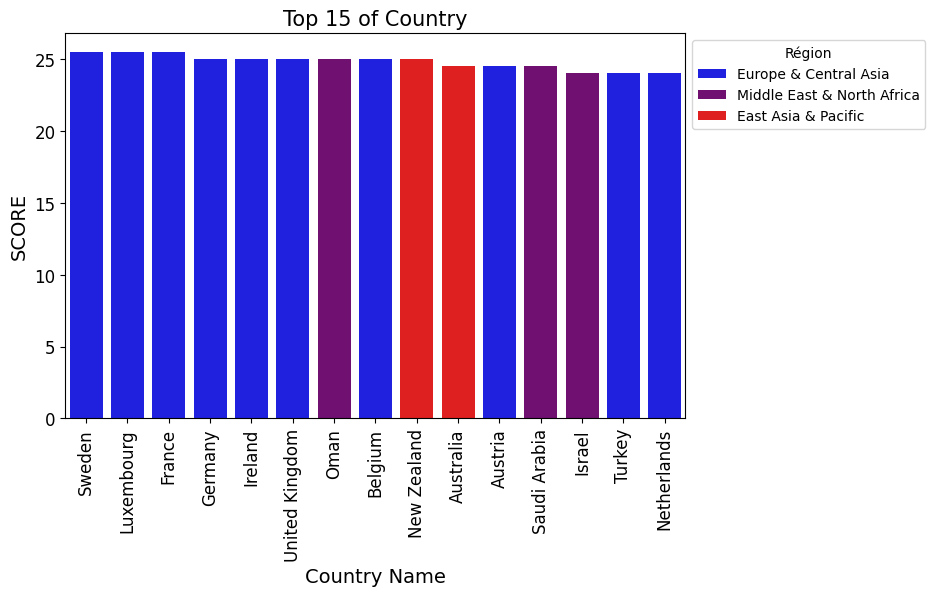

In [71]:
# Appel de la fonction
visualisation_top(Data_final, 15)

On note une forte concentration de pays Européens dans ce classement avec en tête la Suède et le Luxembourg. D'autres régions sont représentées comme l'Asie de l'est et le Pacifique ainsi que le Moyen orient et l'Afrique du Nord. Ce classement a été obtenu à partir de données obtenues en 2015. Il serait important de pouvoir faire des analyses prédictives en prenant en compte l'évolution des différents indicateurs au cours du temps. 

## Contribution des différents indicateurs dans le classement

Afin de savoir ce qui a joué dans l'établissement de ce classement on peut visualiser la contribution des différents indicateurs en regardant leur score pour chacun des pays

In [72]:
def contribution(df, top):
    
    """
    Affiche les notes des différents contributeurs (indicateurs) pour les pays en tête du classement.

    Paramètres
     - df (pandas.DataFrame): DataFrame finale contenant au minimum les colonnes 'Country Name', 'Region' et
        les colonnes des indicateurs contributeurs (colonnes 3 à 8 supposées contenir ces notes).
     - top (int): Nombre de premiers pays à inclure dans le graphique.
    """
    
    # Filter de la table de classement pour n'afficher que le top souhaité
    TOP = df.iloc[:top]
    
    # Initialisation du graphique
    plt.figure(figsize=(8,5))

    # Construction du graphique
    g = sns.PairGrid(TOP,
                 x_vars=TOP.columns[2:8], y_vars=["Country Name"],
                 height=10, aspect=.25, hue = 'Region',  palette=Colors_region, )
    
    # Ajout de points horizontaux sans jitter
    g.map(sns.stripplot, size=10, orient="h", jitter=False)
    
    # Personnalisation des axes
    for ax in g.axes.flat:
        ax.xaxis.grid(False)
        ax.yaxis.grid(True)
        ax.set_xlabel(ax.get_xlabel(), fontsize=15)  
        ax.set_ylabel(ax.get_ylabel(), fontsize=15)  
        ax.tick_params(axis='both', labelsize=14)
        ax.set_xlabel(ax.get_xlabel(), fontsize=12)  
    
    # Ajout d'un titre global
    plt.suptitle(f"Contribution des indicateurs - Top {top}", fontsize=16, fontweight='bold')

    # Suppression des bordures gauche et inférieure
    sns.despine(left=True, bottom=True)


<Figure size 800x500 with 0 Axes>

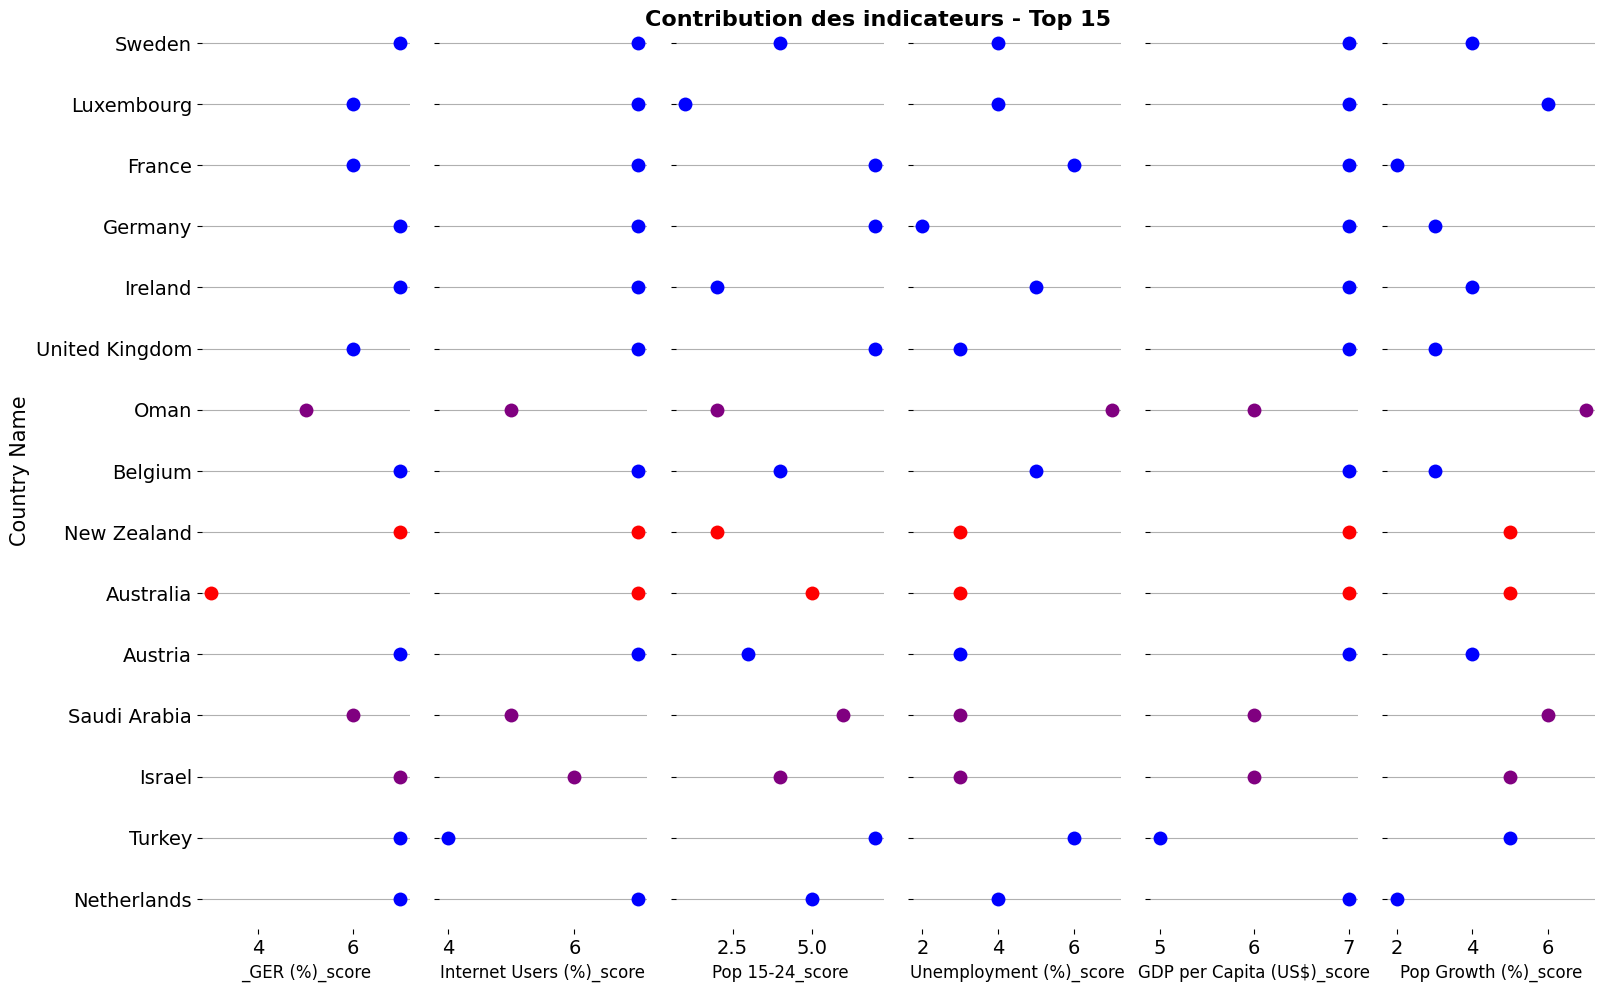

In [73]:
# Appel de la fonction
contribution(Data_final, 15)

# Conclusions

L'analyse des données de la banque mondiale a permit d'identifier des pays à fort potentiel pour le projet d'extension d'Academy. 

L’analyse réalisée valide l’intérêt des données de la Banque mondiale comme support fiable pour orienter la stratégie d’expansion internationale d’Academy. En particulier, les résultats ont montré que le continent européen se distingue comme une cible privilégiée grâce à son fort pouvoir d’achat et à des infrastructures numériques solides, favorisant ainsi un environnement propice au déploiement des contenus de formation en ligne de la startUp. Par ailleurs, plusieurs autres régions présentent également des pays bien positionnés dans le classement qui a été établi, ouvrant des perspectives prometteuses pour diversifier la présence géographique de la startUp.

Pour renforcer la qualité des décisions à moyen et long terme, il serait pertinent d’intégrer des modèles prédictifs capables d’estimer l’évolution future des indicateurs clés. Cette approche proactive permettrait d’ajuster en continu les investissements qui seront fait ainsi que les priorités, en fonction des tendances émergentes, afin d’optimiser le retour sur investissement et d’assurer une croissance durable de l’entreprise à l’échelle internationale.